<h2 style="color:darkred;font-size:30px">Projet 3 : Anticipez les besoins en consommation électrique de bâtiments</h2>

<img src="images\seattle.png" alt="Drawing" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 2 : Analyse Exploratoire</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Sommaire</h2>

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# seaborn settings
# plt.style.use("seaborn-whitegrid") 

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# quelques arrangement sur jupyter

# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'bold',
        'size': 30,
        }

In [3]:
# lire le fichier csv 
data = pd.read_csv('data/building-energy-benchmarking_data_clean.csv')
print('Le jeu des données data compte {} colonnes et {} lignes.'.format(data.shape[1]
                                                                        , data.shape[0]))

Le jeu des données data compte 30 colonnes et 1688 lignes.


In [4]:
data.head(3)

OSEBuildingID    BuildingType PrimaryPropertyType             PropertyName  \
0              1  NonResidential               Hotel     Mayflower park hotel   
1              2  NonResidential               Hotel          Paramount Hotel   
2              3  NonResidential               Hotel  5673-The Westin Seattle   

   CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  \
0                    7     Downtown       1927                  1   
1                    7     Downtown       1996                  1   
2                    7     Downtown       1969                  1   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   

   PropertyGFABuilding(s)   ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                   88434                       Hotel                  Hotel   
1                   88502  Hotel, Parking, Restaurant                  Hotel   
2                  759392                       Hotel                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                      88434                          NaN   
1                      83880                      Parking   
2                     756493                          NaN   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                                0                         NaN   
1                            15064                  Restaurant   
2                                0                         NaN   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                               0             60.0                82   
1                            4622             61.0                95   
2                               0             43.0                96   

   SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0                 182              7226362         2003882            3946027   
1                 176              8387933               0            3242851   
2                 242             72587024        21566554           49526664   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  ZipCode  \
0           1276453                250                   2.83    98101   
1           5145082                296                   2.86    98101   
2           1493800               2089                   2.19    98101   

   BuildingAge  
0           94  
1           25  
2           52

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1688 non-null   int64  
 1   BuildingType                     1688 non-null   object 
 2   PrimaryPropertyType              1688 non-null   object 
 3   PropertyName                     1688 non-null   object 
 4   CouncilDistrictCode              1688 non-null   int64  
 5   Neighborhood                     1688 non-null   object 
 6   YearBuilt                        1688 non-null   int64  
 7   NumberofBuildings                1688 non-null   int64  
 8   NumberofFloors                   1688 non-null   int64  
 9   PropertyGFATotal                 1688 non-null   int64  
 10  PropertyGFAParking               1688 non-null   int64  
 11  PropertyGFABuilding(s)           1688 non-null   int64  
 12  ListOfAllPropertyUse

# 5. Analyse Exploratoire

Nous allons à present effectuer une analyse exploratoire sur les indicateurs. Nous commençons par les deux variable à predire. Ce sont 
- **SiteEnergyUse(kBtu)** 
- **TotalGHGEmissions**

### TotalGHGEmissions & SiteEnergyUse(kBtu)

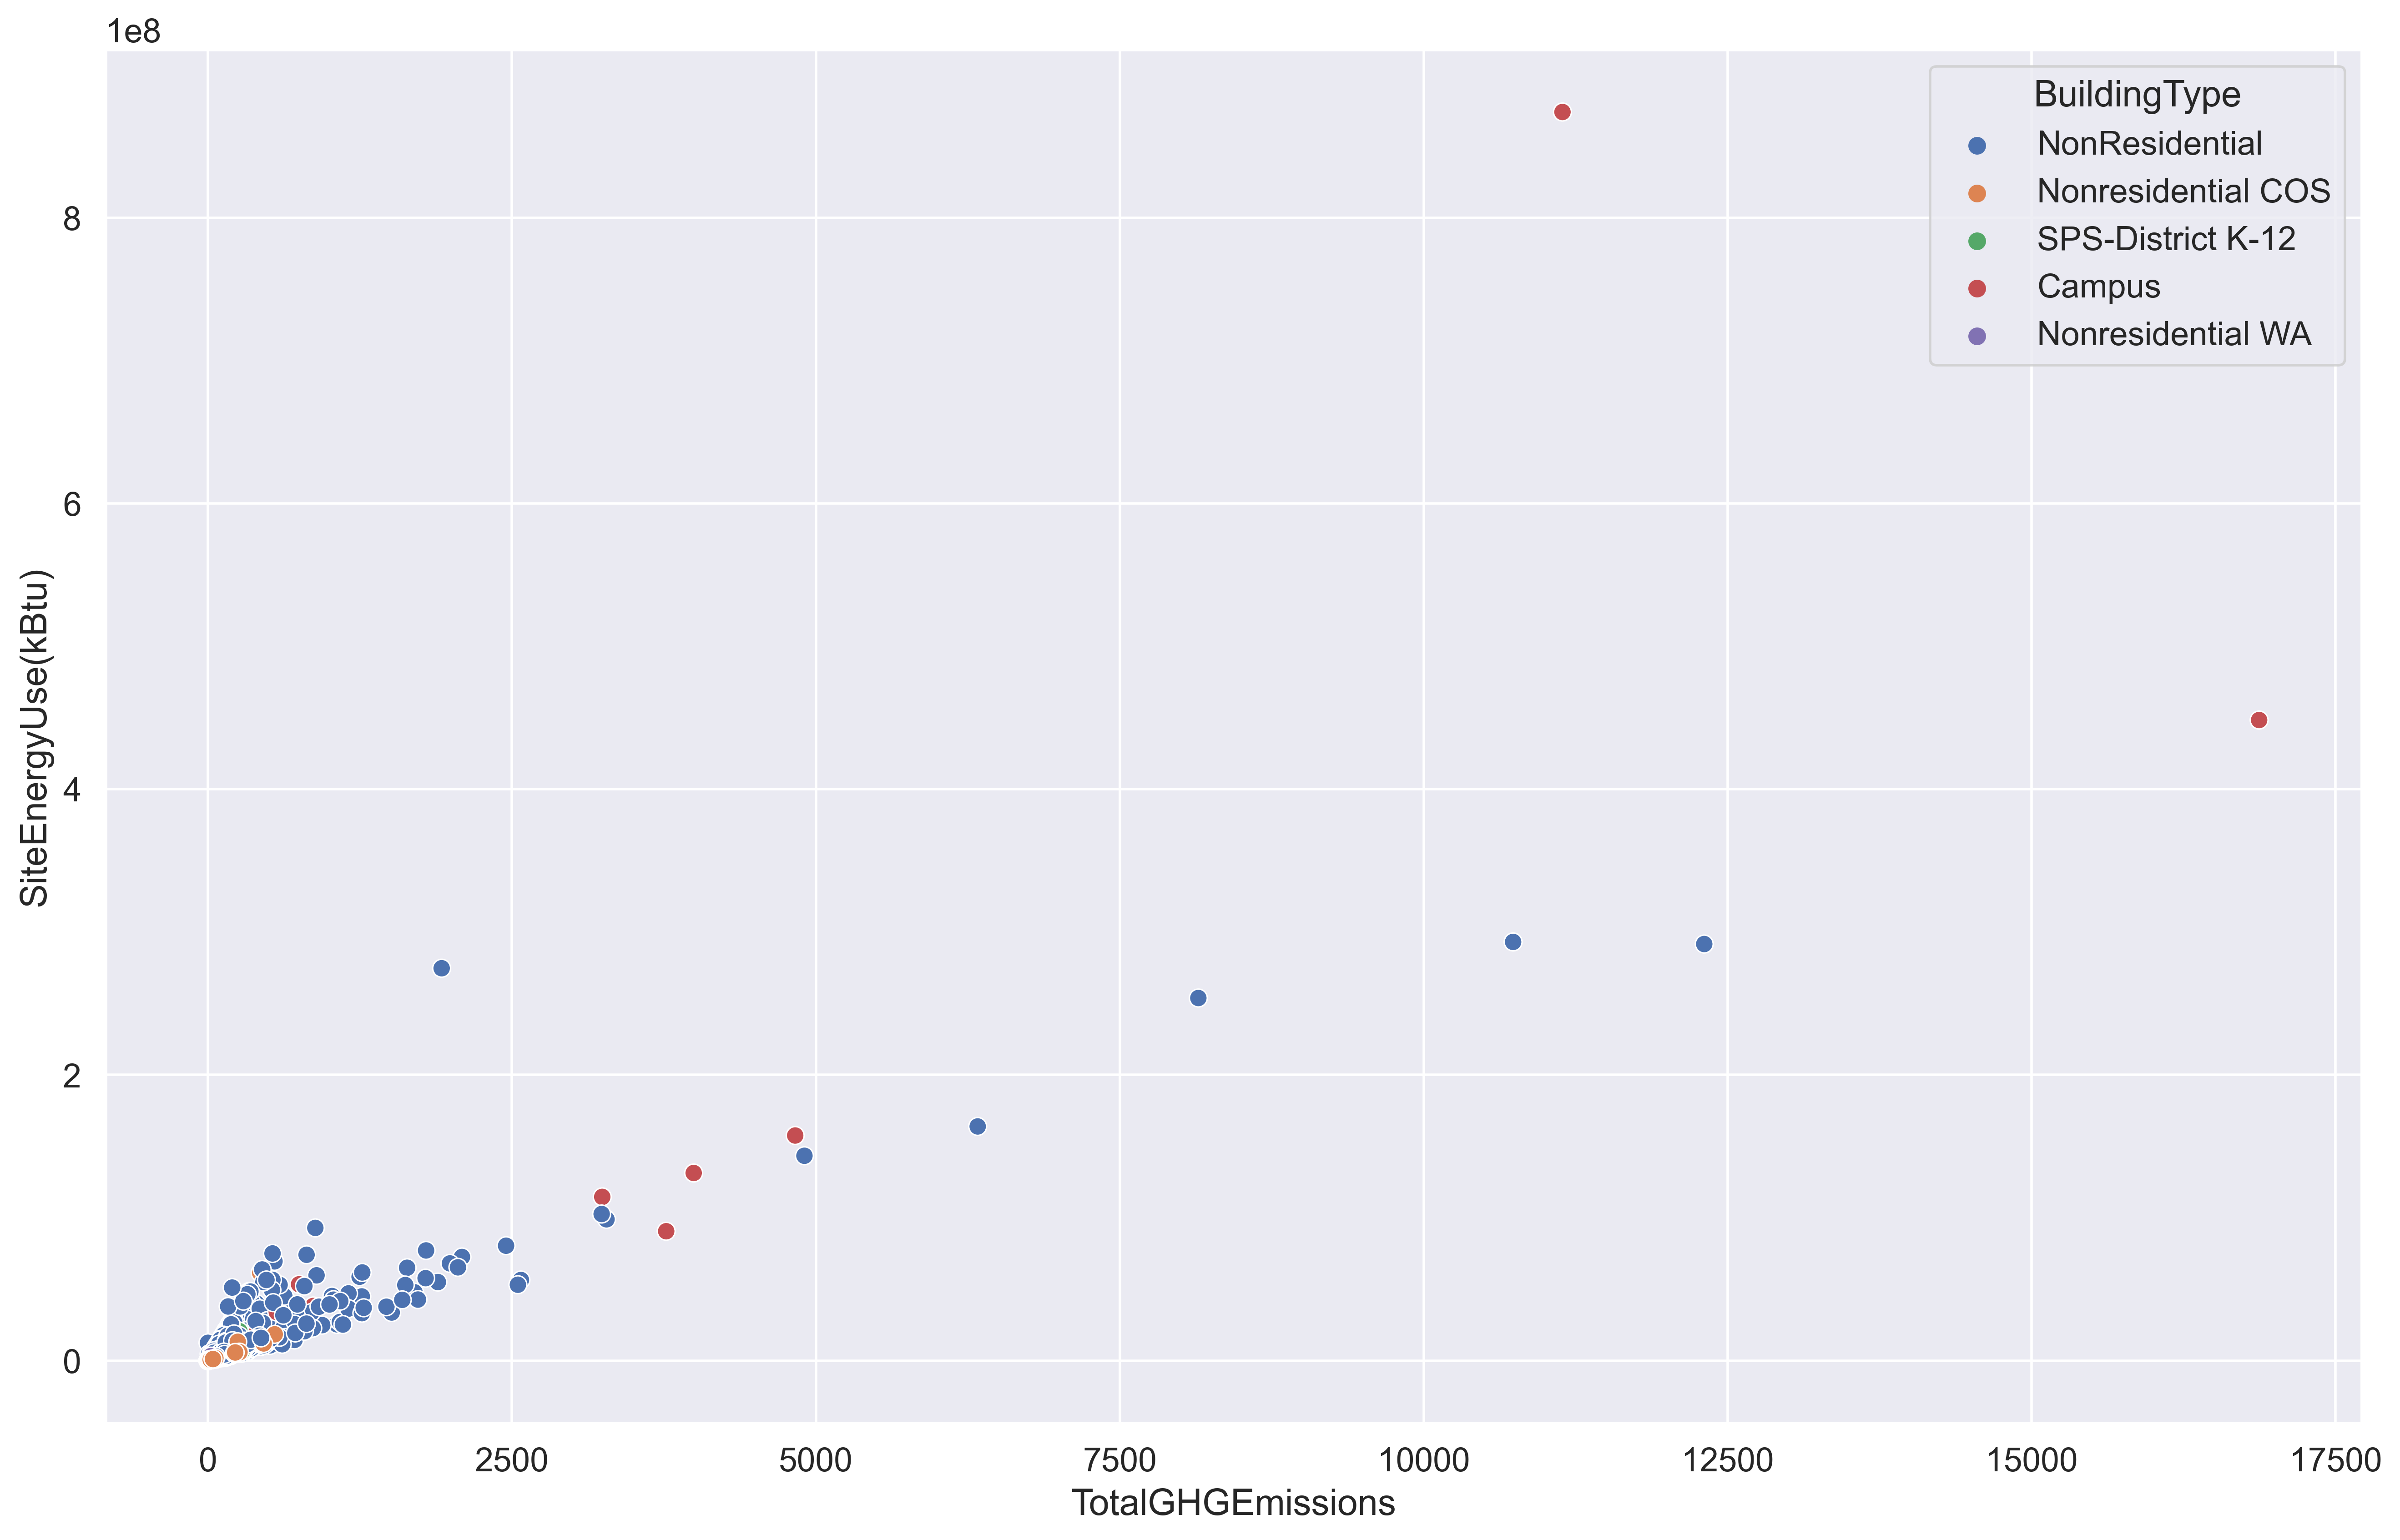

In [6]:
plt.figure(figsize=(16, 10), dpi=400)
sns.set(font_scale=1.2)
ax = sns.scatterplot(y='SiteEnergyUse(kBtu)',
                     x='TotalGHGEmissions',
                     data=data,
                     s=50,
                     hue='BuildingType')
    
plt.show()

**Sur cette graphique, Nous aperçevons deux outliers (un campus)**

Voyons les valeurs entre 0 et 2500, c'est-à-dire : zoomed x7

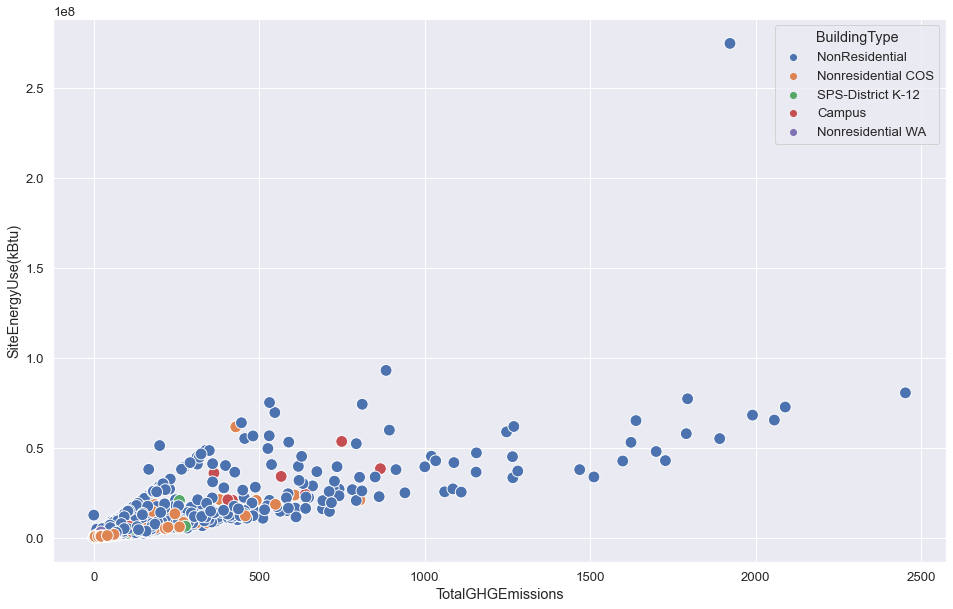

In [7]:
plt.figure(figsize=(16, 10))
sns.scatterplot(y='SiteEnergyUse(kBtu)',
                x='TotalGHGEmissions',
                data=data[data['TotalGHGEmissions'] < 2500],
                s=140,
                hue='BuildingType')
plt.show()

In [8]:
data[data['SiteEnergyUse(kBtu)'] > 4*10**8]

OSEBuildingID BuildingType PrimaryPropertyType  \
34               43       Campus  Mixed Use Property   
1650          49967       Campus          University   

                                   PropertyName  CouncilDistrictCode  \
34                                 Plant 2 Site                    2   
1650  University of Washington - Seattle Campus                    4   

          Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
34    Greater duwamish       1992                  1               3   
1650         Northeast       1900                111               0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
34              494835                   0                  494835   
1650           9320156                   0                 9320156   

                              ListOfAllPropertyUseTypes  \
34    Energy/Power Station, Laboratory, Manufacturin...   
1650                                 College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
34                   Office                     757027   
1650     College/University                    9320156   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
34                     Laboratory                           639931   
1650                          NaN                                0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
34    Non-Refrigerated Warehouse                          459748   
1650                         NaN                               0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
34                8.0               222                 388   
1650              NaN                94                 247   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
34              448385312               0          150476283   
1650            873923712        84985240          657074389   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  ZipCode  \
34           297909000              16871                  34.09    98108   
1650                 0              11141                   1.20    98105   

      BuildingAge  
34             29  
1650          121

In [9]:
data[data['TotalGHGEmissions'] > 15*10**3]

OSEBuildingID BuildingType PrimaryPropertyType  PropertyName  \
34             43       Campus  Mixed Use Property  Plant 2 Site   

    CouncilDistrictCode      Neighborhood  YearBuilt  NumberofBuildings  \
34                    2  Greater duwamish       1992                  1   

    NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
34               3            494835                   0   

    PropertyGFABuilding(s)                          ListOfAllPropertyUseTypes  \
34                  494835  Energy/Power Station, Laboratory, Manufacturin...   

   LargestPropertyUseType  LargestPropertyUseTypeGFA  \
34                 Office                     757027   

   SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
34                   Laboratory                           639931   

   ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
34  Non-Refrigerated Warehouse                          459748   

    ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
34              8.0               222                 388   

    SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
34            448385312               0          150476283         297909000   

    TotalGHGEmissions  GHGEmissionsIntensity  ZipCode  BuildingAge  
34              16871                  34.09    98108           29

In [10]:
data = data[data['SiteEnergyUse(kBtu)'] < 6*10**8]
data = data[data['TotalGHGEmissions'] < 15*10**3]

In [11]:
print('TotalGHGEmissions')
print('----'*10)
print("moy:", data['TotalGHGEmissions'].mean())
print("med:", data['TotalGHGEmissions'].median())
print("std:", data['TotalGHGEmissions'].std(ddof=0))
print("skw:", data['TotalGHGEmissions'].skew())
print("kur:", data['TotalGHGEmissions'].kurtosis())

print('\nSiteEnergyUse(kBtu)')
print('----'*10)
print("moy:", data['SiteEnergyUse(kBtu)'].mean())
print("med:", data['SiteEnergyUse(kBtu)'].median())
print("std:", data['SiteEnergyUse(kBtu)'].std(ddof=0))
print("skw:", data['SiteEnergyUse(kBtu)'].skew())
print("kur:", data['SiteEnergyUse(kBtu)'].kurtosis())

TotalGHGEmissions
----------------------------------------
moy: 172.3991696322657
med: 50.0
std: 581.4914437420538
skw: 12.74548564161256
kur: 212.63364490778778

SiteEnergyUse(kBtu)
----------------------------------------
moy: 7796975.4673784105
med: 2588369.0
std: 19002487.43977279
skw: 8.80251906770725
kur: 107.52375443612614


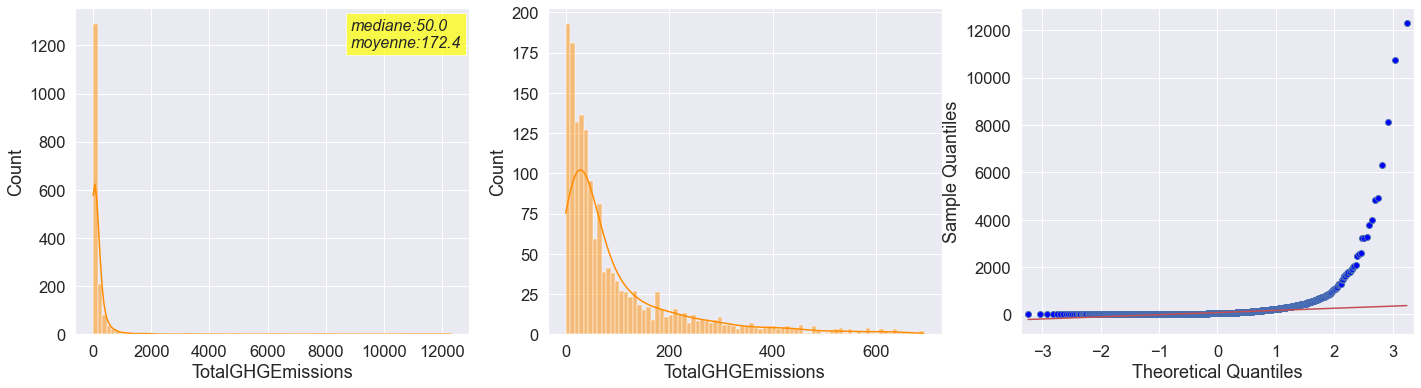

In [12]:
import pylab as py

sns.set(
    rc={'figure.figsize': (24, 6)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)

ax = sns.histplot(data=data,
             x='TotalGHGEmissions',
             kde=True,
             ax=axes[0],
             bins=80,
             color="darkorange")
ax.text(0.7, 0.88, 'mediane:{:.3}\nmoyenne:{}'.format(data['TotalGHGEmissions'].median(), round(data['TotalGHGEmissions'].mean(),2)), style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'yellow', 'alpha':0.7, 'pad':5})
sns.histplot(data=data[(data['TotalGHGEmissions'] < 700)],
             x='TotalGHGEmissions',
             ax=axes[1],
             bins=80,
             kde=True,
             color="darkorange")
sm.qqplot(data['TotalGHGEmissions'], ax=axes[2], line="q")

py.show()

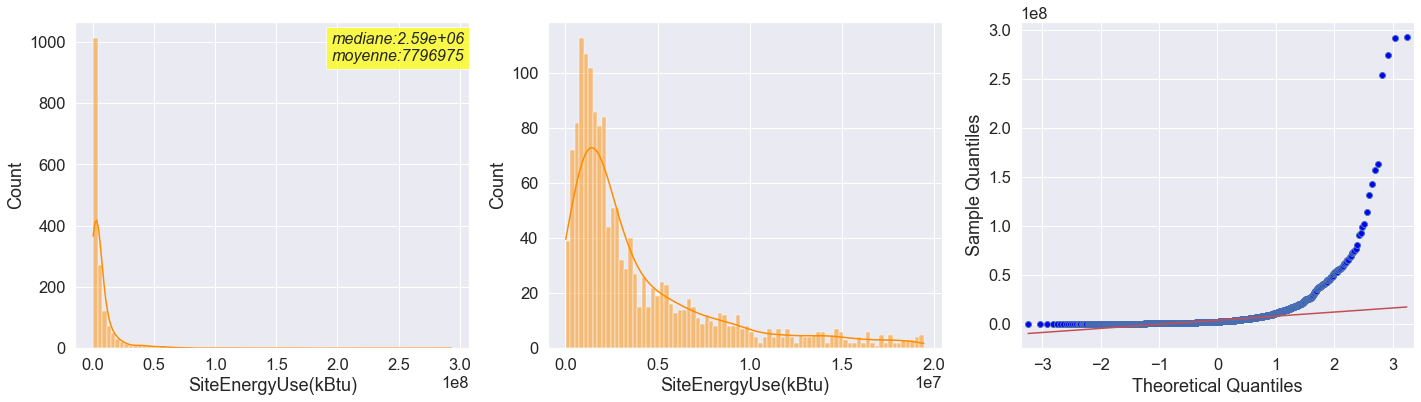

In [13]:
sns.set(rc={'figure.figsize': (24, 6)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)

ax = sns.histplot(data=data,
             x='SiteEnergyUse(kBtu)',
             ax=axes[0],
             bins=80,
             kde=True,
             color="darkorange")
ax.text(0.65, 0.88, 'mediane:{:.3}\nmoyenne:{}'.format((data['SiteEnergyUse(kBtu)'].median()), round(data['SiteEnergyUse(kBtu)'].mean())), style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'yellow', 'alpha':0.7, 'pad':5})
sns.histplot(data=data[(data['SiteEnergyUse(kBtu)'] < 20000000)],
             x='SiteEnergyUse(kBtu)',
             ax=axes[1],
             bins=80,
             kde=True,
             color="darkorange")
sm.qqplot(data['SiteEnergyUse(kBtu)'], ax=axes[2], line="q")

py.show()

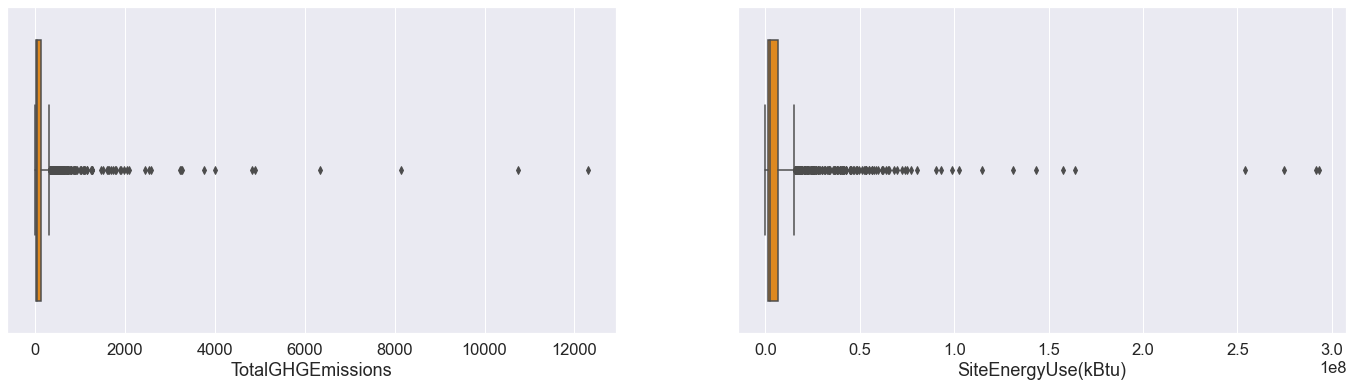

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

sns.boxplot(data=data, x='TotalGHGEmissions', ax=axes[0], color="darkorange")

sns.boxplot(data=data, x='SiteEnergyUse(kBtu)', ax=axes[1], color="darkorange")

plt.show()

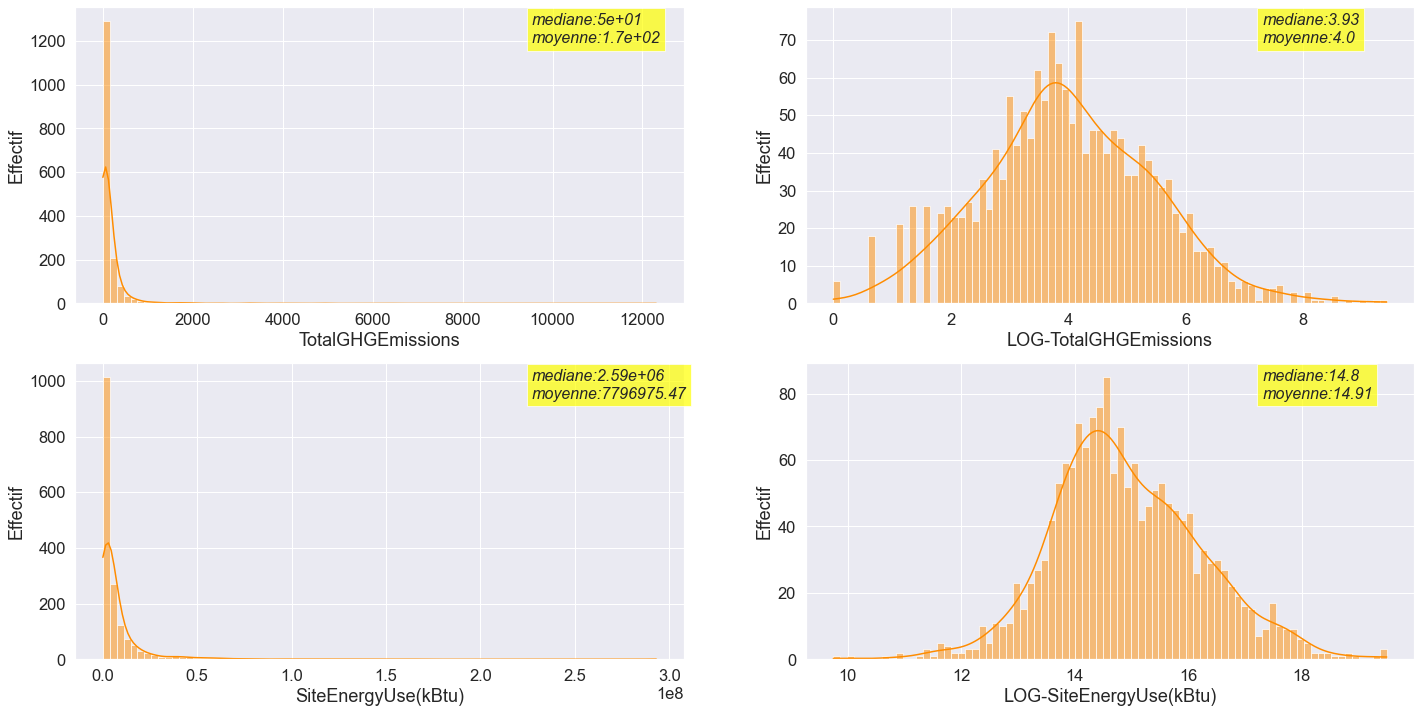

In [15]:
sns.set(
    rc={'figure.figsize': (24, 12)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

# -----

ax1 = sns.histplot(data=data,
                   x='TotalGHGEmissions',
                   ax=axes[0, 0],
                   bins=80,
                   kde=True,
                   color="darkorange")
ax1.text(0.75,
         0.88,
         'mediane:{:.2}\nmoyenne:{:.2}'.format(
             data['TotalGHGEmissions'].median(),
             data['TotalGHGEmissions'].mean(),
         ),
         style='italic',
         transform=ax1.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         })

ax2 = sns.histplot(data=data,
                   x=np.log(data['TotalGHGEmissions'].values + 1),
                   kde=True,
                   ax=axes[0, 1],
                   bins=80,
                   color="darkorange")
ax2.text(0.75,
         0.88,
         'mediane:{:.3}\nmoyenne:{}'.format(
             np.log(data['TotalGHGEmissions'] + 1).median(),
             round(np.log(data['TotalGHGEmissions'] + 1).mean(), 2)),
         style='italic',
         transform=ax2.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         })
ax2.set_ylabel("Effectif", fontsize=18)
ax1.set_ylabel("Effectif", fontsize=18)
ax2.set_xlabel("LOG-TotalGHGEmissions", fontsize=18)

# -----

ax3 = sns.histplot(data=data,
                   x='SiteEnergyUse(kBtu)',
                   ax=axes[1, 0],
                   bins=80,
                   kde=True,
                   color="darkorange")
ax3.text(0.75,
         0.88,
         'mediane:{:.3}\nmoyenne:{}'.format(
             data['SiteEnergyUse(kBtu)'].median(),
             round(data['SiteEnergyUse(kBtu)'].mean(), 2)),
         style='italic',
         transform=ax3.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         })

ax4 = sns.histplot(data=data,
                   x=np.log(data['SiteEnergyUse(kBtu)'].values + 1),
                   kde=True,
                   ax=axes[1, 1],
                   bins=80,
                   color="darkorange")
ax4.text(0.75,
         0.88,
         'mediane:{:.3}\nmoyenne:{}'.format(
             np.log(data['SiteEnergyUse(kBtu)'] + 1).median(),
             round(np.log(data['SiteEnergyUse(kBtu)'] + 1).mean(), 2)),
         style='italic',
         transform=ax4.transAxes,
         fontsize=16,
         bbox={
             'facecolor': 'yellow',
             'alpha': 0.7,
             'pad': 5
         })
ax4.set_ylabel("Effectif", fontsize=18)
ax3.set_ylabel("Effectif", fontsize=18)
ax4.set_xlabel("LOG-SiteEnergyUse(kBtu)", fontsize=18)

plt.show()

Nous ferons les tests statistiques (normality test, Shapiro test) pour voir si les distributions sont Gaussiennes

In [16]:
from scipy.stats import normaltest
from scipy.stats import shapiro

# normality test (normaltest)
stat, p = normaltest(data['TotalGHGEmissions'])
print('TotalGHGEmissions (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (shapiro)
stat, p = shapiro(data['TotalGHGEmissions'])
print('TotalGHGEmissions (Shapiro): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (normaltest)
stat, p = normaltest(data['SiteEnergyUse(kBtu)'])
print('SiteEnergyUse(kBtu) (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (shapiro)
stat, p = shapiro(data['SiteEnergyUse(kBtu)'])
print('SiteEnergyUse(kBtu) (Shapiro): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

TotalGHGEmissions (normaltest): 
Statistics=3041.926, p=0.000
Sample does not look Gaussian (reject H0)
TotalGHGEmissions (Shapiro): 
Statistics=0.229, p=0.000
Sample does not look Gaussian (reject H0)
SiteEnergyUse(kBtu) (normaltest): 
Statistics=2495.587, p=0.000
Sample does not look Gaussian (reject H0)
SiteEnergyUse(kBtu) (Shapiro): 
Statistics=0.344, p=0.000
Sample does not look Gaussian (reject H0)


### BuildingType

Nous constatons que les campus consomment plus energie que les autre type des bâtiments

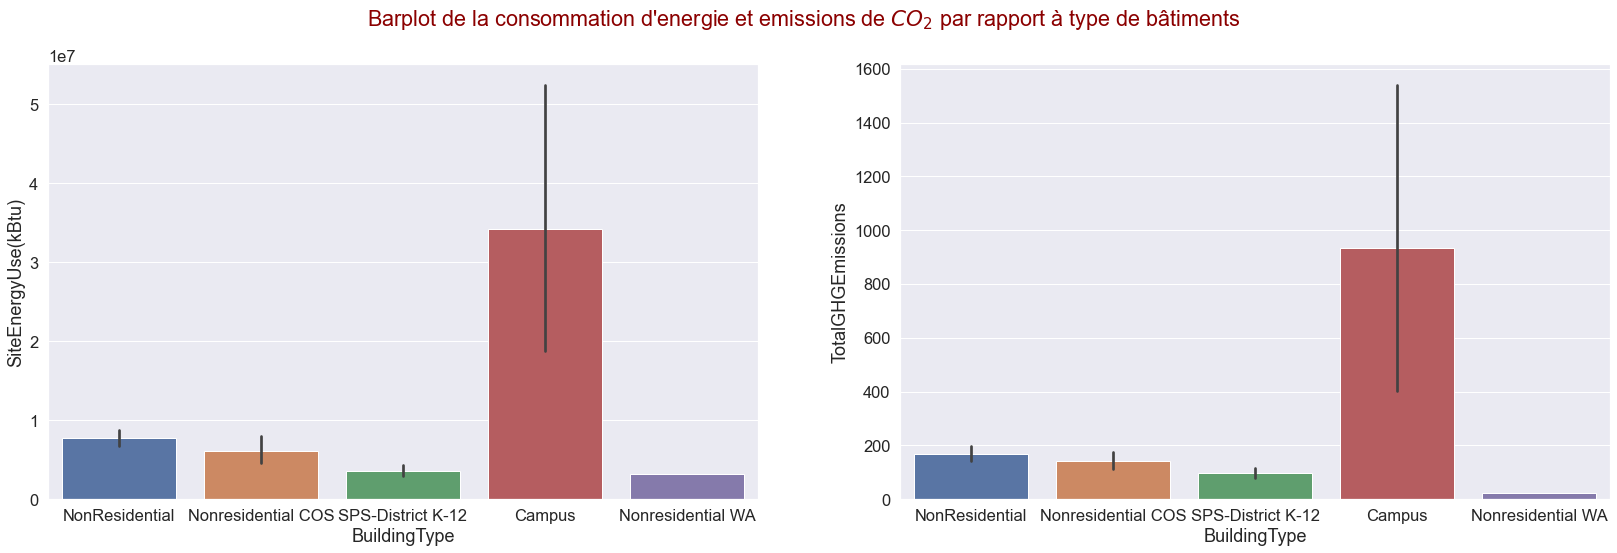

In [17]:
sns.set_theme(style="white", palette=None)
sns.set(rc = {'figure.figsize':(28,8)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.barplot(ax=axes[0], data=data, y='SiteEnergyUse(kBtu)', x='BuildingType')
sns.barplot(ax=axes[1], data=data, y='TotalGHGEmissions', x='BuildingType')
#sns.scatterplot(ax=axes[2], data=data, x='SiteEnergyUseWN(kBtu)', y='SiteEnergyUse(kBtu)')

plt.suptitle("Barplot de la consommation d'energie et emissions de $CO_2$ par rapport à type de bâtiments",
            fontdict=font)
plt.show()

In [18]:
from numpy import mean
from numpy import std

# statistiques
data_mean, data_std = mean(data['NumberofBuildings']), std(data['NumberofBuildings'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identifie outliers
outliers = [x for x in data['NumberofBuildings'] if x < lower or x > upper]
print(len(outliers))
print(lower)
print(upper)

22
-2.3686104198294364
4.573829874159212


In [19]:
data[data['NumberofBuildings'] > 4].sort_values('NumberofBuildings', ascending=False)

OSEBuildingID        BuildingType          PrimaryPropertyType  \
103             172              Campus                   University   
1113          23622              Campus                        Other   
159             261              Campus                 Large Office   
1338          25251              Campus                   University   
125             211              Campus                   University   
1179          24086              Campus                        Other   
166             276      NonResidential                     Hospital   
1613          49705  Nonresidential COS                        Other   
1071          23071      NonResidential                     Hospital   
612             828      NonResidential                     Hospital   
1634          49859              Campus                        Other   
121             198      NonResidential                     Hospital   
361             516      NonResidential                        Other   
1517          27389      NonResidential  Small- and Mid-Sized Office   
163             268      NonResidential                     Hospital   
837           21122      NonResidential           Mixed Use Property   
1069          23064      NonResidential                        Other   
1076          23117              Campus                        Other   
1085          23265              Campus                        Other   
741           20325              Campus                  K-12 School   
1547          27833      NonResidential                        Other   
1601          40447  Nonresidential COS           Mixed Use Property   

                                           PropertyName  CouncilDistrictCode  \
103                                    SSCC MAIN CAMPUS                    1   
1113                          FT C15 Fishermen's Center                    7   
159                                          South Park                    1   
1338                            5th Avenue Master Meter                    7   
125                                    NSCC MAIN CAMPUS                    5   
1179  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...                    2   
166                           Harborview Medical Center                    3   
1613                                           Magnuson                    4   
1071                          Main Hospital - All Wings                    5   
612                                  Swedish First Hill                    3   
1634                           AMGEN INC. MASTER CAMPUS                    7   
121             Seattle Children's Hospital Main Campus                    4   
361                              Aurora Shopping Center                    5   
1517                                  Leschi Lakecenter                    3   
163                                 Swedish Cherry Hill                    3   
837                      Fremont Court-Equinox Building                    6   
1069                                 Evergreen Washelli                    5   
1076                   Joint Training Facilities Campus                    1   
1085                                      T102 1011 B/C                    1   
741                             University Prep Academy                    4   
1547                                Sound Mental Health                    3   
1601                                        OCC Complex                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
103                Delridge       1970                 27               2   
1113  Magnolia / queen anne       1955                 23               1   
159        Greater duwamish       1980                 14               2   
1338  Magnolia / queen anne       1945                 14               2   
125               Northwest       1970                 11               2   
1179       Greater duwamish       1991        

In [20]:
data[data['BuildingType'] == 'Campus'].shape[0]

23

In [21]:
# data = data[data['NumberofBuildings'] < 10]

In [22]:
# data = data[data['BuildingType'] != 'Campus']

In [23]:
data[data['NumberofBuildings'] > 10]

OSEBuildingID BuildingType PrimaryPropertyType  \
103             172       Campus          University   
125             211       Campus          University   
159             261       Campus        Large Office   
1113          23622       Campus               Other   
1338          25251       Campus          University   

                   PropertyName  CouncilDistrictCode           Neighborhood  \
103            SSCC MAIN CAMPUS                    1               Delridge   
125            NSCC MAIN CAMPUS                    5              Northwest   
159                  South Park                    1       Greater duwamish   
1113  FT C15 Fishermen's Center                    7  Magnolia / queen anne   
1338    5th Avenue Master Meter                    7  Magnolia / queen anne   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
103        1970                 27               2            441071   
125        1970                 11               2            694072   
159        1980                 14               2            334368   
1113       1955                 23               1            260241   
1338       1945                 14               2            537000   

      PropertyGFAParking  PropertyGFABuilding(s)  \
103                    0                  441071   
125               111625                  582447   
159                31874                  302494   
1113                   0                  260241   
1338                   0                  537000   

                              ListOfAllPropertyUseTypes  \
103                                  College/University   
125                                  College/University   
159   Laboratory, Non-Refrigerated Warehouse, Office...   
1113                                              Other   
1338                                 College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
103      College/University                     483000   
125      College/University                     667335   
159                  Office                     240984   
1113                  Other                     260241   
1338     College/University                     533826   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
103                           NaN                                0   
125                           NaN                                0   
159                    Laboratory                            72963   
1113                          NaN                                0   
1338                          NaN                                0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
103                          NaN                               0   
125                          NaN                               0   
159              Other - Utility                           16766   
1113                         NaN                               0   
1338                         NaN                               0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
103               NaN                79                 193   
125               NaN                54                 161   
159               NaN               160                 451   
1113              NaN               131                 353   
1338              NaN               170                 267   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
103              38301744               0           25314575   
125              35891484               0           33450832   
159              53466684               0           45321378   
1113             34012980               0           26894616   
1338             90609640               0           22619097   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  ZipCode  \
103           12987166                866                   1.96    98106

### PrimaryPropertyType

In [24]:
data['PrimaryPropertyType'].nunique()

23

In [25]:
def top_words(df, column="PrimaryPropertyType", nb_top=10):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]

In [26]:
from wordcloud import WordCloud


def plot_world_cloud(df=data, column="PrimaryPropertyType", nb_top=100):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df=data, column=column, nb_top=nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#424342',
                           colormap='Set2')
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("Nuage de mots dans la colonne {}\n".format(column), fontdict=font)
    plt.show()

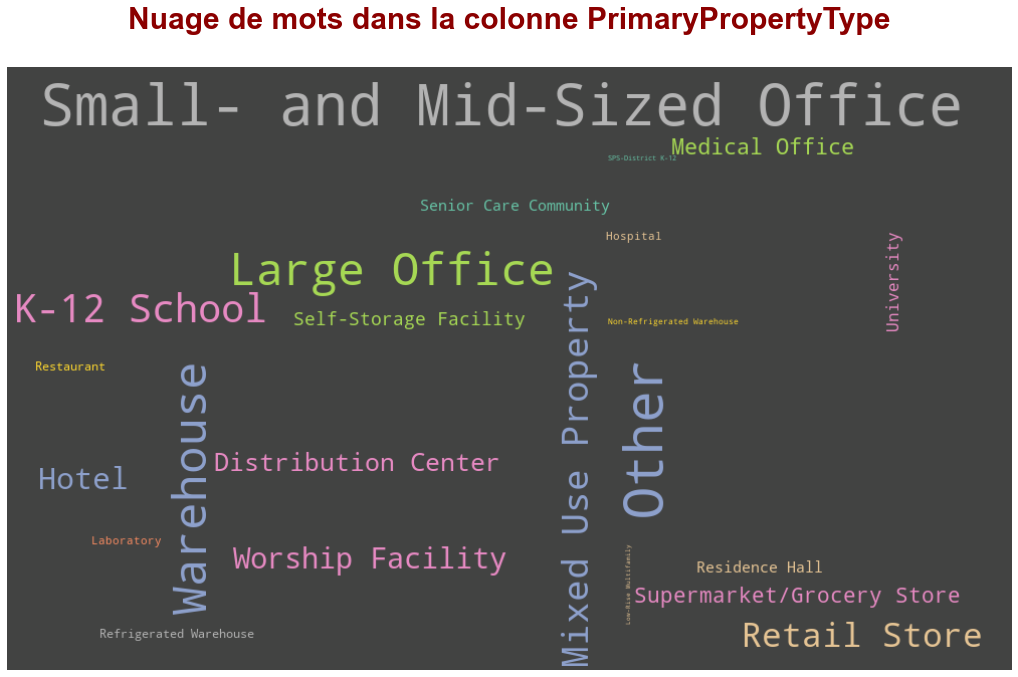

In [27]:
plot_world_cloud(df=data,column="PrimaryPropertyType",nb_top=100)

In [28]:
PrimaryPropertyType= data['PrimaryPropertyType'].value_counts().head(57).to_frame()
PrimaryPropertyType.style.background_gradient(cmap='Reds')

### CouncilDistrictCode

_*administrative districts*_

<img src="images/CouncilDistrictCode.jpg" alt="Drawing" style="width: 300px;"/>

_**resource**_ : https://www.seattle.gov/cityclerk/agendas-and-legislative-resources/find-your-council-district

In [29]:
data['CouncilDistrictCode'].unique()

array([7, 3, 2, 4, 5, 6, 1])

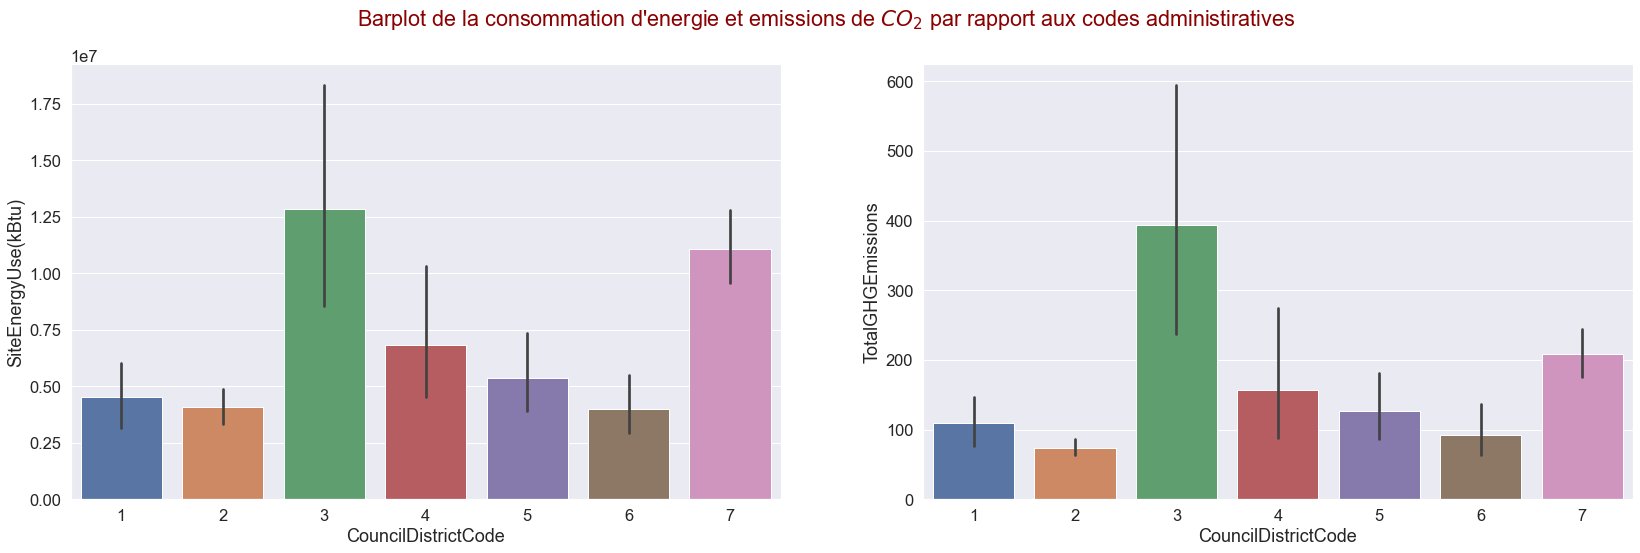

In [30]:
sns.set_theme(style="white", palette=None)
sns.set(rc = {'figure.figsize':(28,8)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.barplot(ax=axes[0], data=data, y='SiteEnergyUse(kBtu)', x='CouncilDistrictCode')
sns.barplot(ax=axes[1], data=data, y='TotalGHGEmissions', x='CouncilDistrictCode')

plt.suptitle("Barplot de la consommation d'energie et emissions de $CO_2$ par rapport aux codes administiratives",
            fontdict=font)
plt.show()

In [31]:
# j'ai remplacé les entier 1,...,7 par les lettres pour avoir les resultats d'OLS plus détaillés.

data['CouncilDistrictCode'] = data['CouncilDistrictCode'].replace({1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'f', 7:'g'})

### Neighborhood

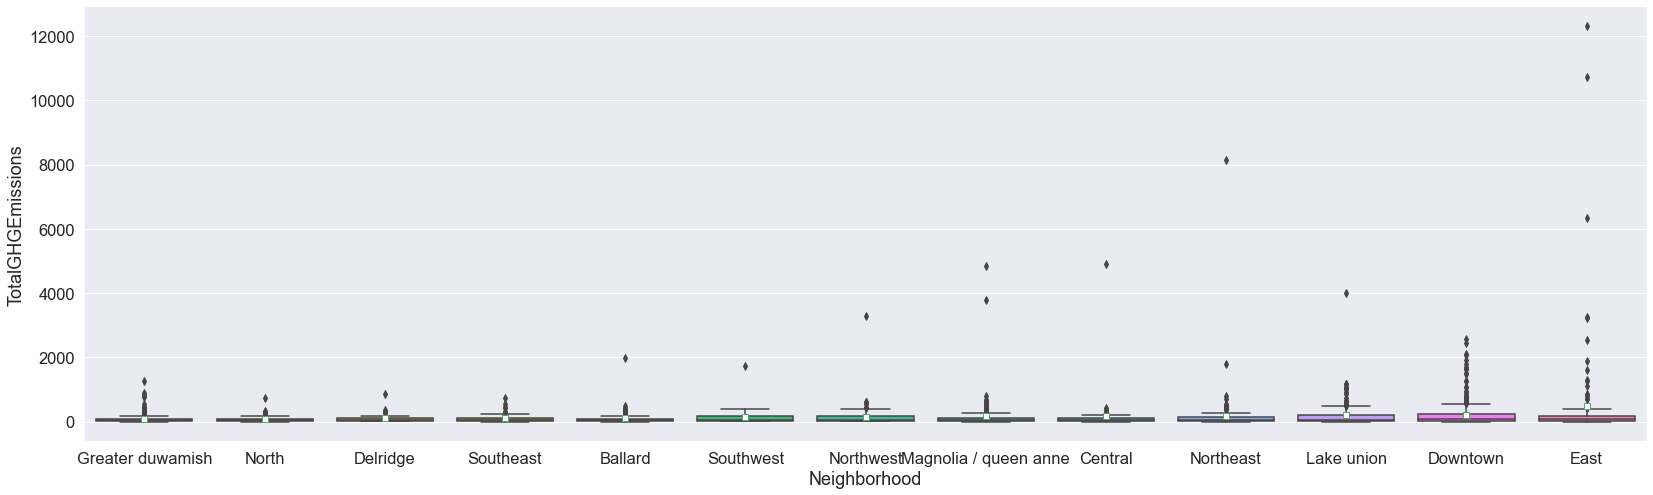

In [32]:
grouped = data.groupby(["Neighborhood"])
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

sns.boxplot(x = data['Neighborhood'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.show()

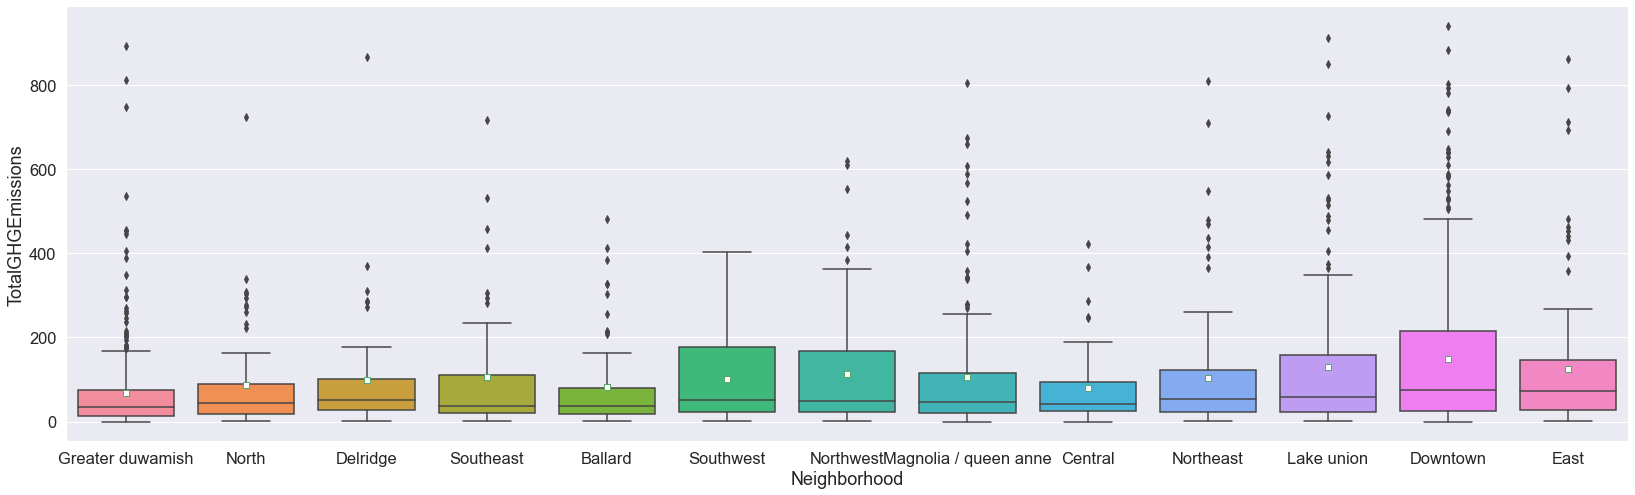

In [33]:
grouped = data.groupby(["Neighborhood"])
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

sns.boxplot(x = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<1000))]['Neighborhood'],
            y = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<1000))]['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<1000))],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.show()

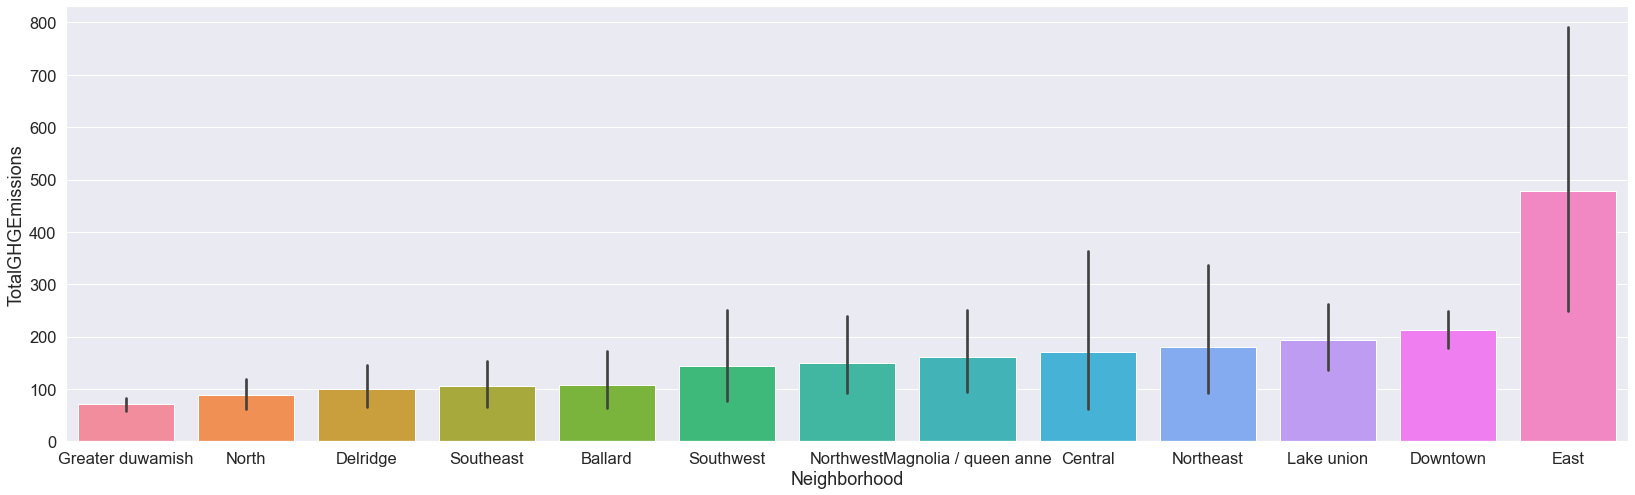

In [34]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

sns.barplot(x = data['Neighborhood'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            saturation=0.9,
            order=order,
            #showmeans=True,
            #meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.show()

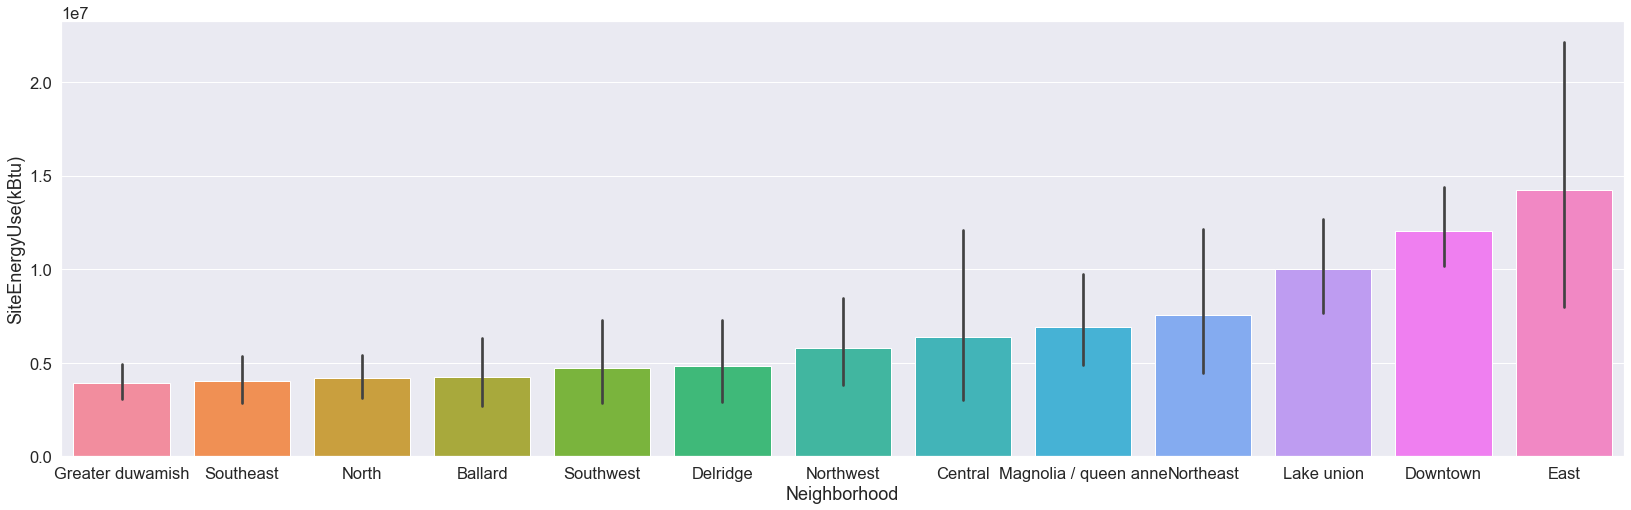

In [35]:
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

sns.barplot(x = data['Neighborhood'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            saturation=0.9,
            order=order,
            #showmeans=True,
            #meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.show()

In [36]:
anova_variete_c = smf.ols('TotalGHGEmissions~BuildingType+PrimaryPropertyType+CouncilDistrictCode+Neighborhood', data=data).fit()
print(anova_variete_c.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     37.25
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.29e-212
Time:                        09:13:00   Log-Likelihood:                -12541.
No. Observations:                1686   AIC:                         2.517e+04
Df Residuals:                    1641   BIC:                         2.542e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### YearBuilt

In [37]:
data['BuildingAge'].nunique()

113

In [38]:
print('Le batiment le plus vieux a {} ans.'.format(data['BuildingAge'].max()))
print('Le batiment le plus jeune a {} ans.'.format(data['BuildingAge'].min()))

Le batiment le plus vieux a 121 ans.
Le batiment le plus jeune a 6 ans.


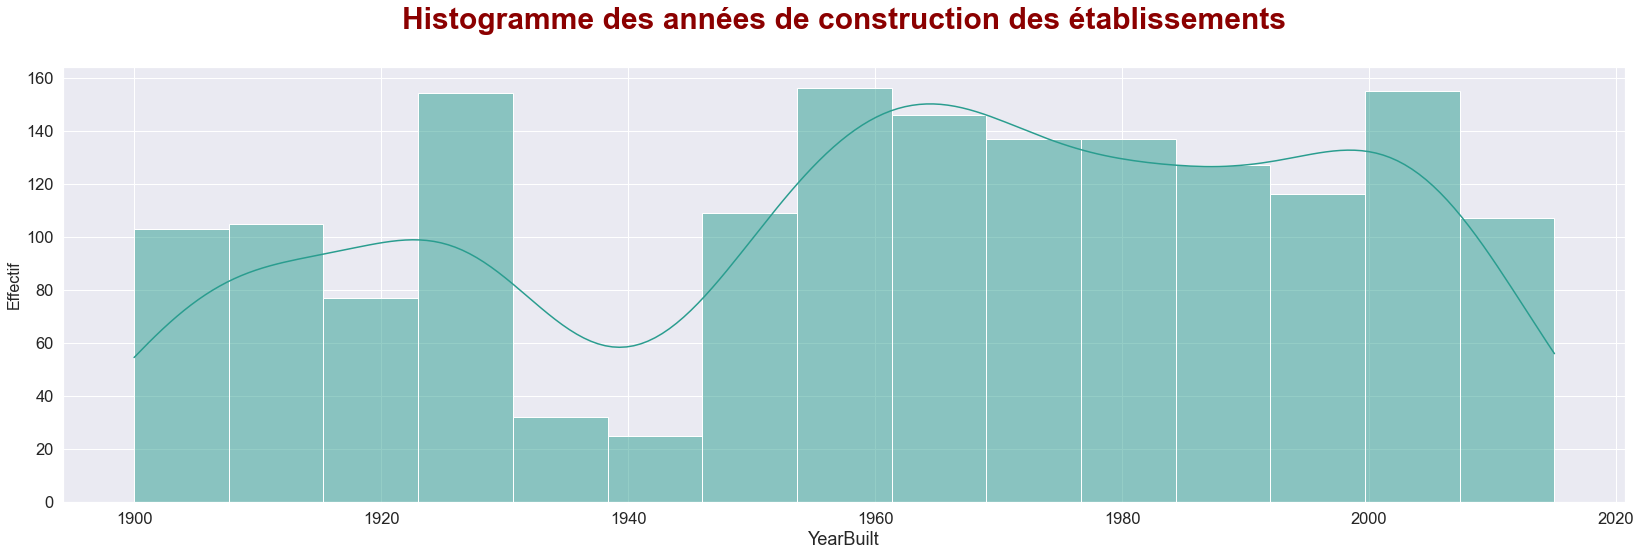

In [39]:
p = sns.histplot(data['YearBuilt'],
                 bins=15,
                 kde=True,
                 color="#2a9d8f",
                 alpha=.5)
p.set_ylabel("Effectif", fontsize=16)
p.set_title("Histogramme des années de construction des établissements\n",
            fontdict=font)
plt.show()

In [40]:
data["AgeGroup"] = pd.cut(data['BuildingAge'], 5, precision=0, labels=["New","Mid-Aged","Aged","Old",'Very Old'])

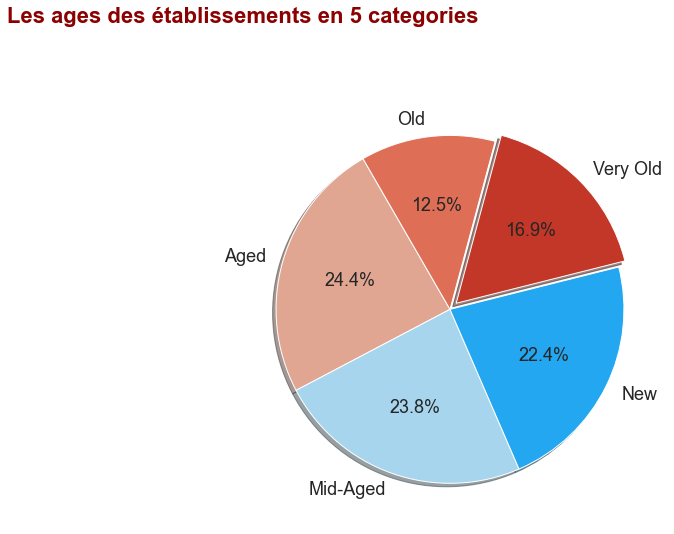

In [41]:
fig = plt.figure(figsize=(30, 20))
fig.text(0,
         1,
         'Les ages des établissements en 5 categories',
         fontdict=font,
         fontsize=22)

couleurs = ({
    "New": '#22a7f0',
    "Mid-Aged": "#a7d5ed",
    "Aged": '#e1a692',
    "Old": '#de6e56',
    'Very Old': '#c23728'
})

data["AgeGroup"].value_counts().plot.pie(
    autopct='%1.1f%%',
    explode=[0, 0, 0, .05, 0],
    colors=[couleurs[v] for v in data["AgeGroup"].value_counts().keys()],
    shadow=True,
    figsize=(12, 8),
    fontsize=18,
    startangle=120)
plt.axis('off')

plt.show()

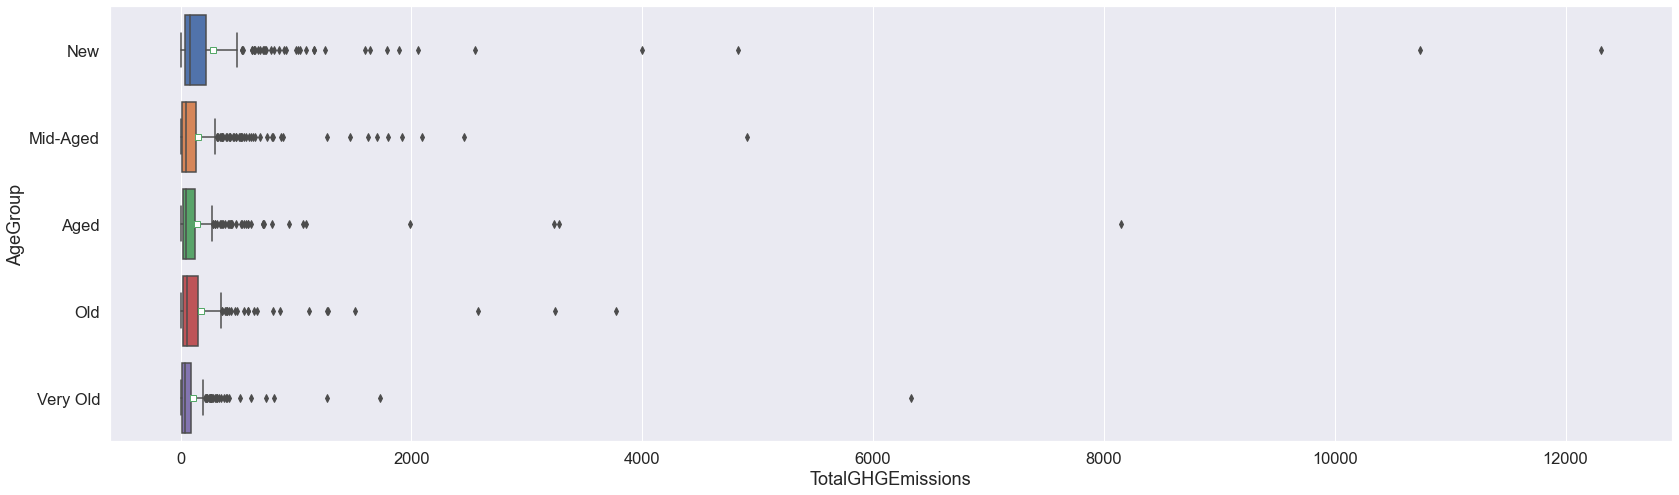

In [42]:
sns.boxplot(y=data['AgeGroup'],
            x=data['TotalGHGEmissions'],
            data=data[data['TotalGHGEmissions'] != np.nan],
            saturation=0.9,
            order=["New", "Mid-Aged", "Aged", "Old", 'Very Old'],
            showmeans=True,
            meanprops={
                "marker": "s",
                "markerfacecolor": "white"
            }
            #color='darkred'
            )

plt.show()

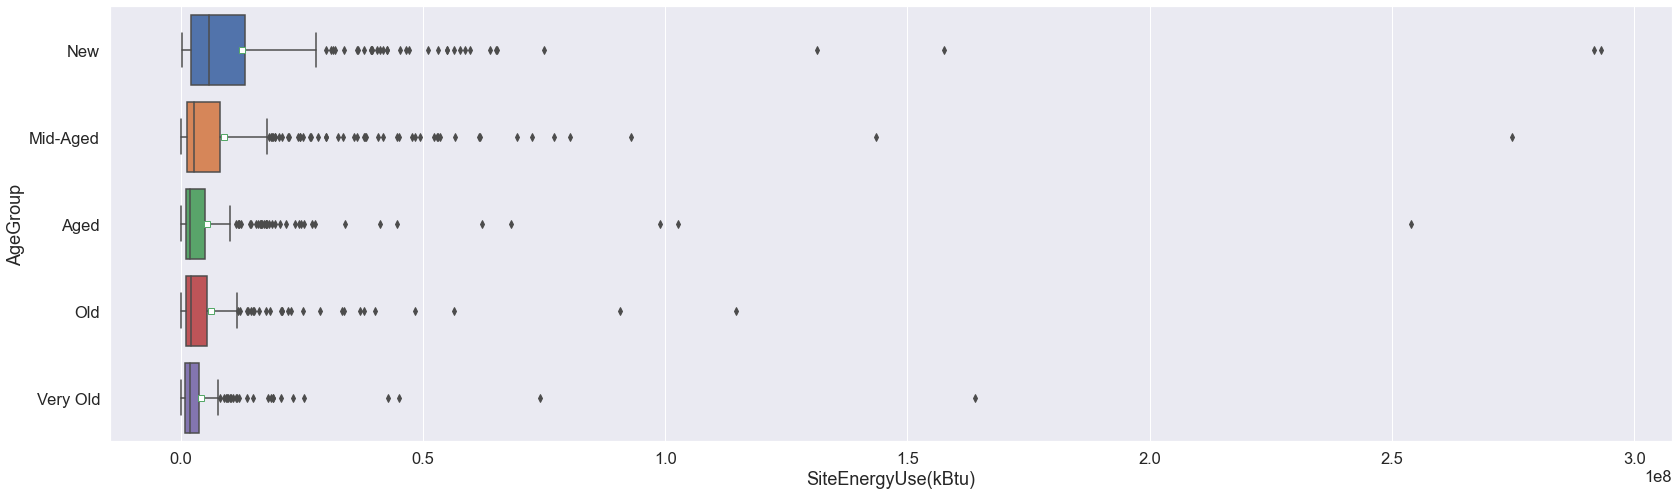

In [43]:
sns.boxplot(y=data['AgeGroup'],
            x=data['SiteEnergyUse(kBtu)'],
            data=data[data['SiteEnergyUse(kBtu)'] != np.nan],
            saturation=0.9,
            order=["New", "Mid-Aged", "Aged", "Old", 'Very Old'],
            showmeans=True,
            meanprops={
                "marker": "s",
                "markerfacecolor": "white"
            }
            #color='darkred'
            )

plt.show()

In [44]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ZipCode', 'BuildingAge', 'AgeGroup'],
      dtype='object')

## Analyse univariée des autres indicateurs

In [45]:
indicateurs = [
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)', 'NaturalGas(kBtu)'
]

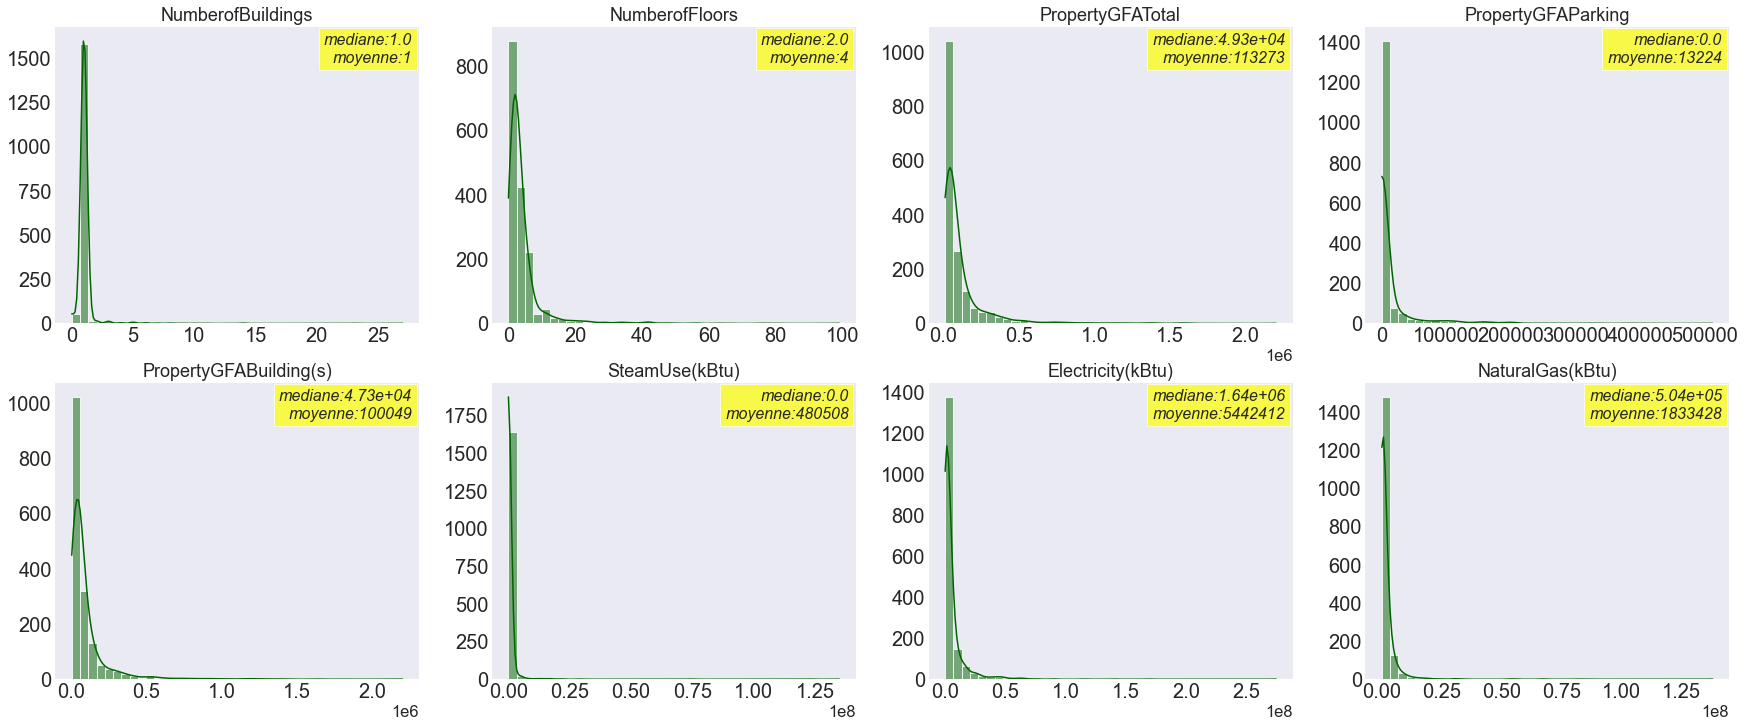

In [46]:
plt.style.use("seaborn-dark")

# Build a rectangle in axes coords
left, width = .48, .5
bottom, height = .42, .45
right = left + width
top = bottom + height


fig = plt.figure(figsize=(30, 12))

start = 0

for i in range(len(indicateurs)):
    fig.add_subplot(2, 4, i + 1)
    column = indicateurs[i]
    ax = sns.histplot(x=data[column], kde=True, bins=40, color="darkgreen")
    ax.text(right,
            top,
            'mediane:{:.3}\nmoyenne:{}'.format((data[column].median()),
                                               round(data[column].mean())),
            style='italic',
            transform=ax.transAxes,
            horizontalalignment='right',
        verticalalignment='bottom',
            fontsize=16,
            bbox={
                'facecolor': 'yellow',
                'alpha': 0.7,
                'pad': 5
            })
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_title("{}".format(column), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_size(20)
    for tick in ax.get_yticklabels():
        tick.set_size(20)
    start = start + 1

# fig.savefig('P3_Support/nutri_distribution.png')
plt.show()

### LargestPropertyUseType

In [47]:
data['LargestPropertyUseType'].nunique()

57

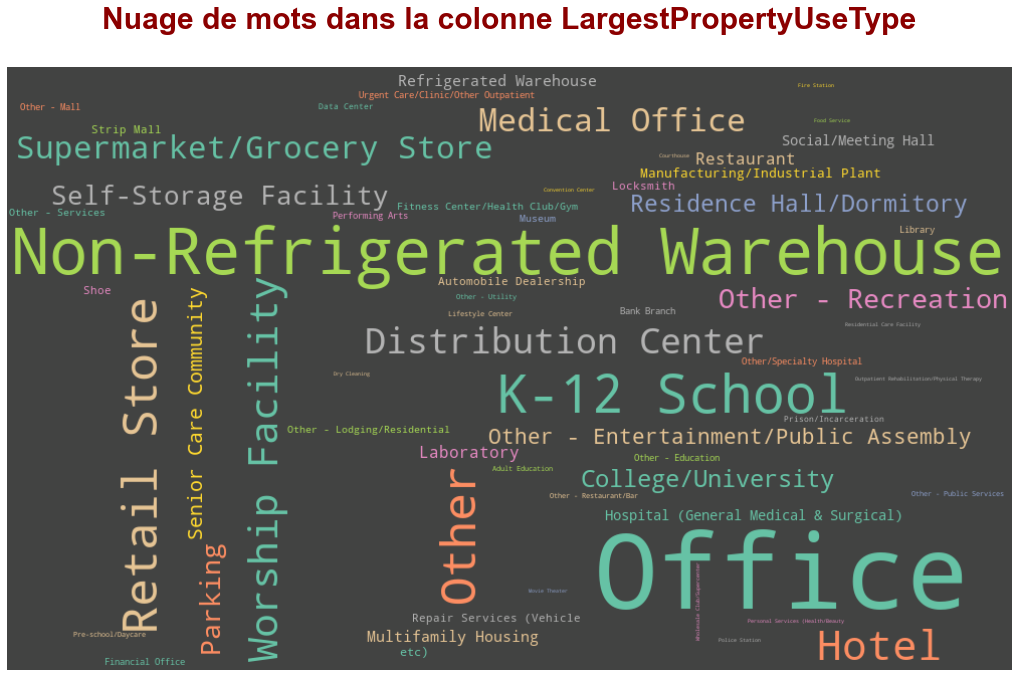

In [48]:
plot_world_cloud(df=data,column="LargestPropertyUseType",nb_top=100)

In [49]:
LargestPropertyUseType = data['LargestPropertyUseType'].value_counts().head(57).to_frame()
LargestPropertyUseType.style.background_gradient(cmap='Reds')

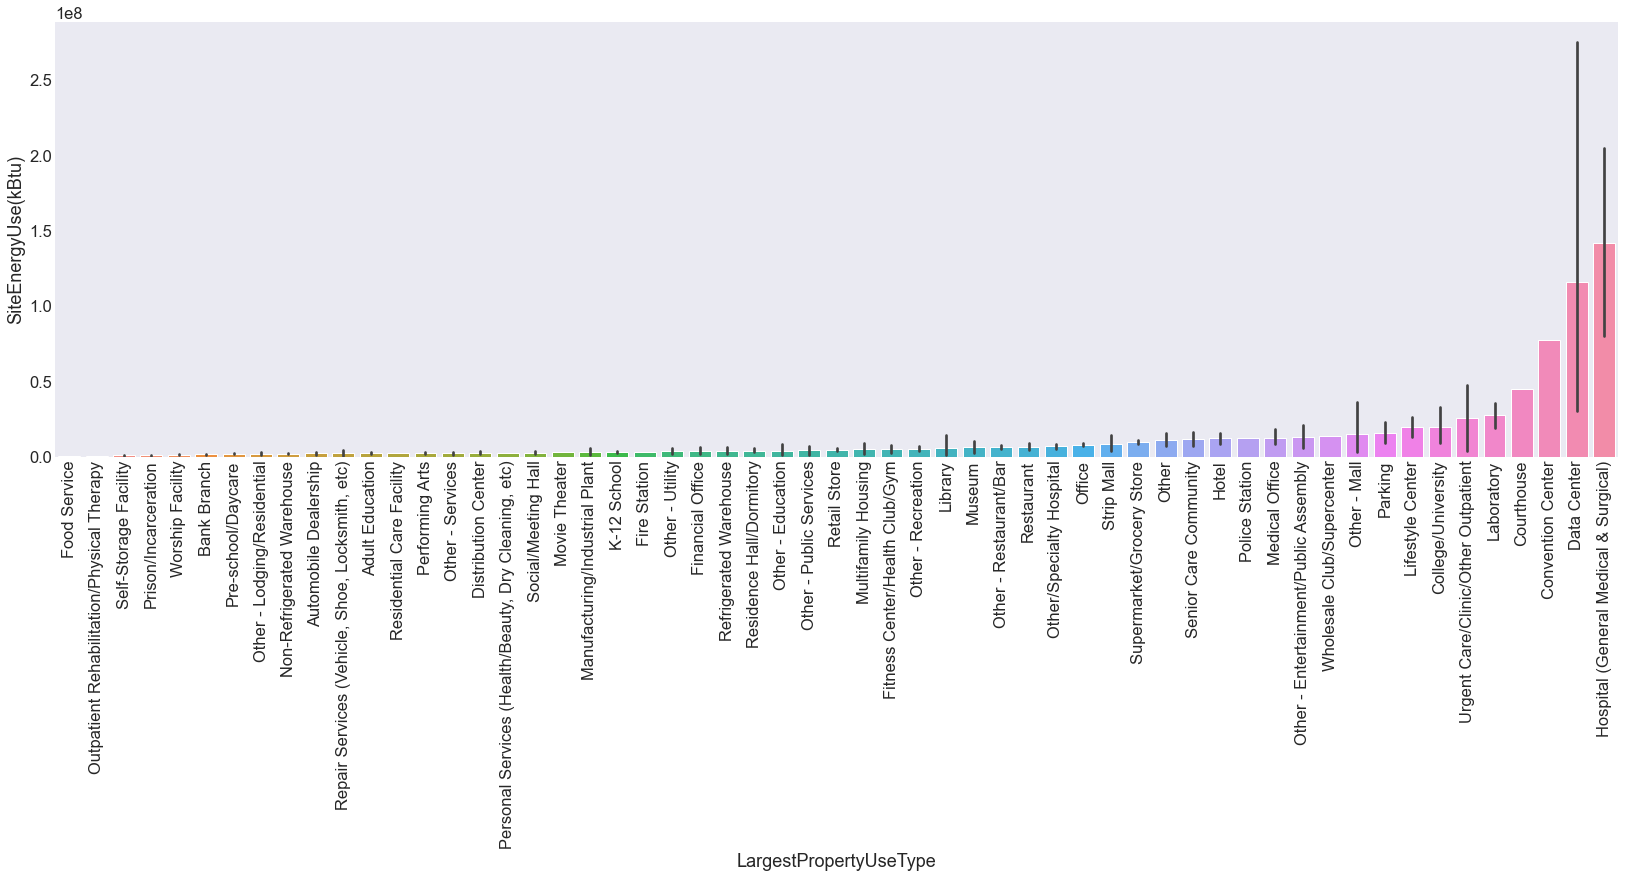

In [50]:
grouped = data.groupby(["LargestPropertyUseType"])
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.barplot(x = data['LargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

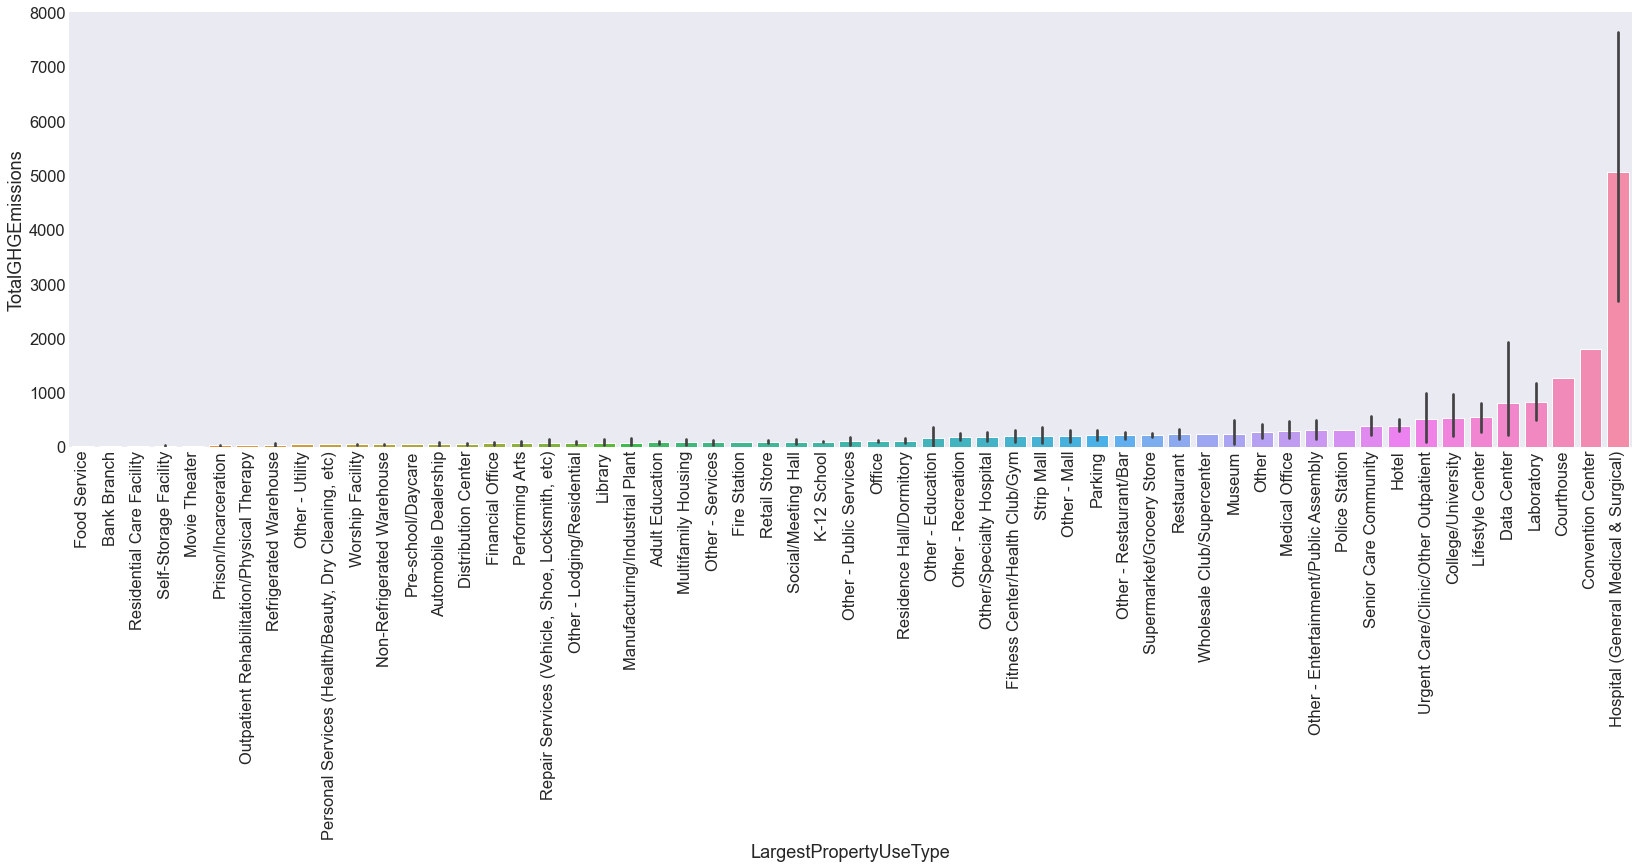

In [51]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.barplot(x = data['LargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

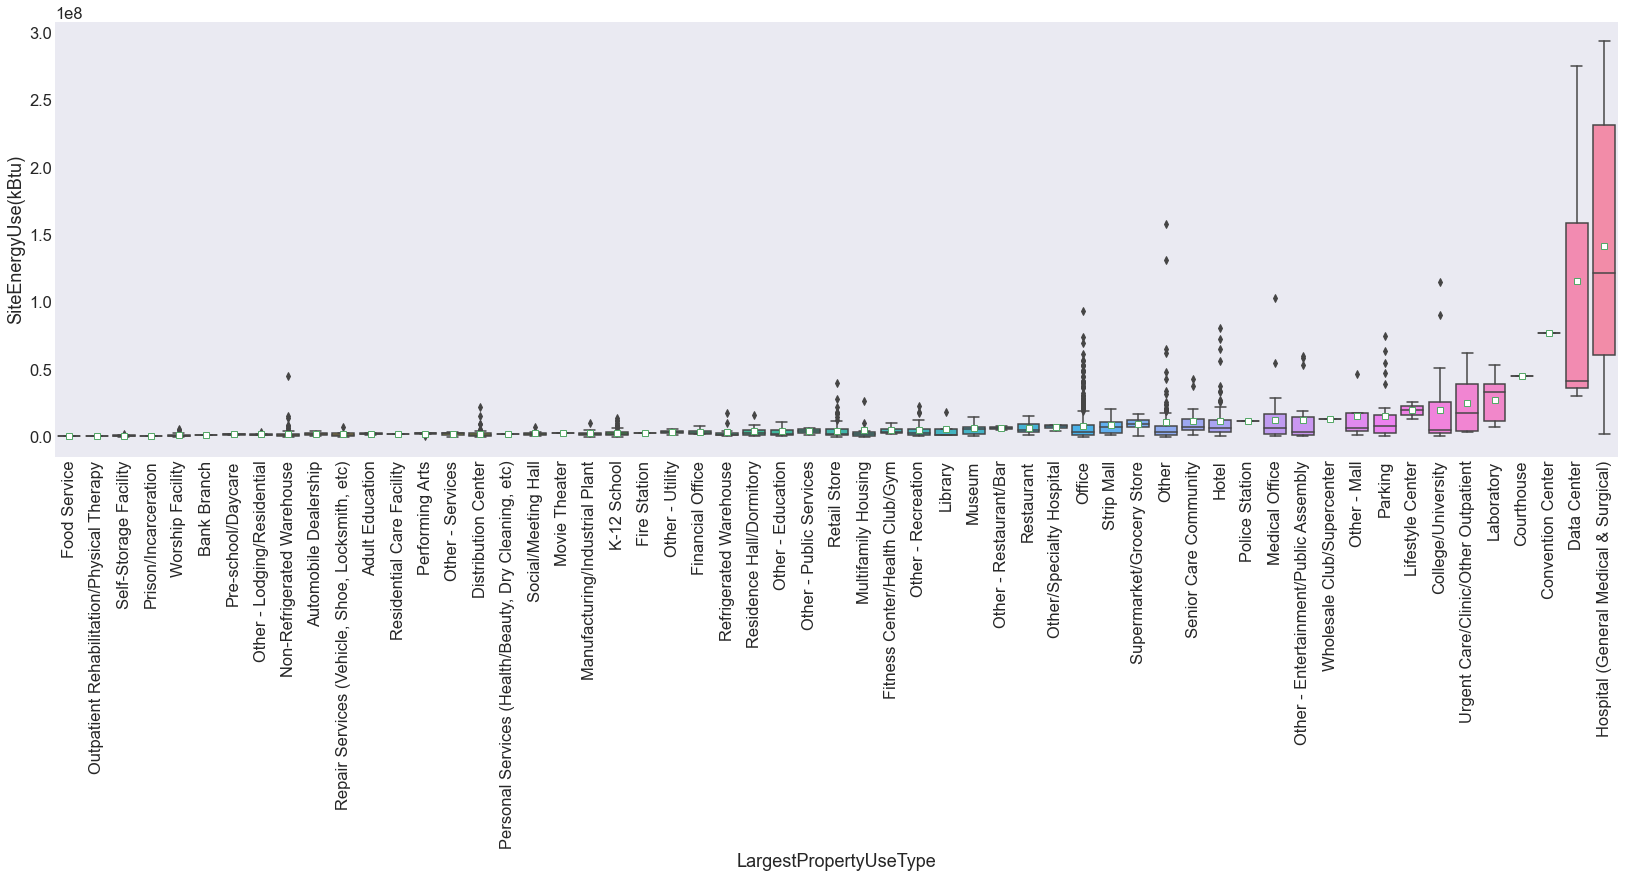

In [52]:
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.boxplot(x = data['LargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()
# ax.set_ylabel(rotation='horizontal', color=lcolor)

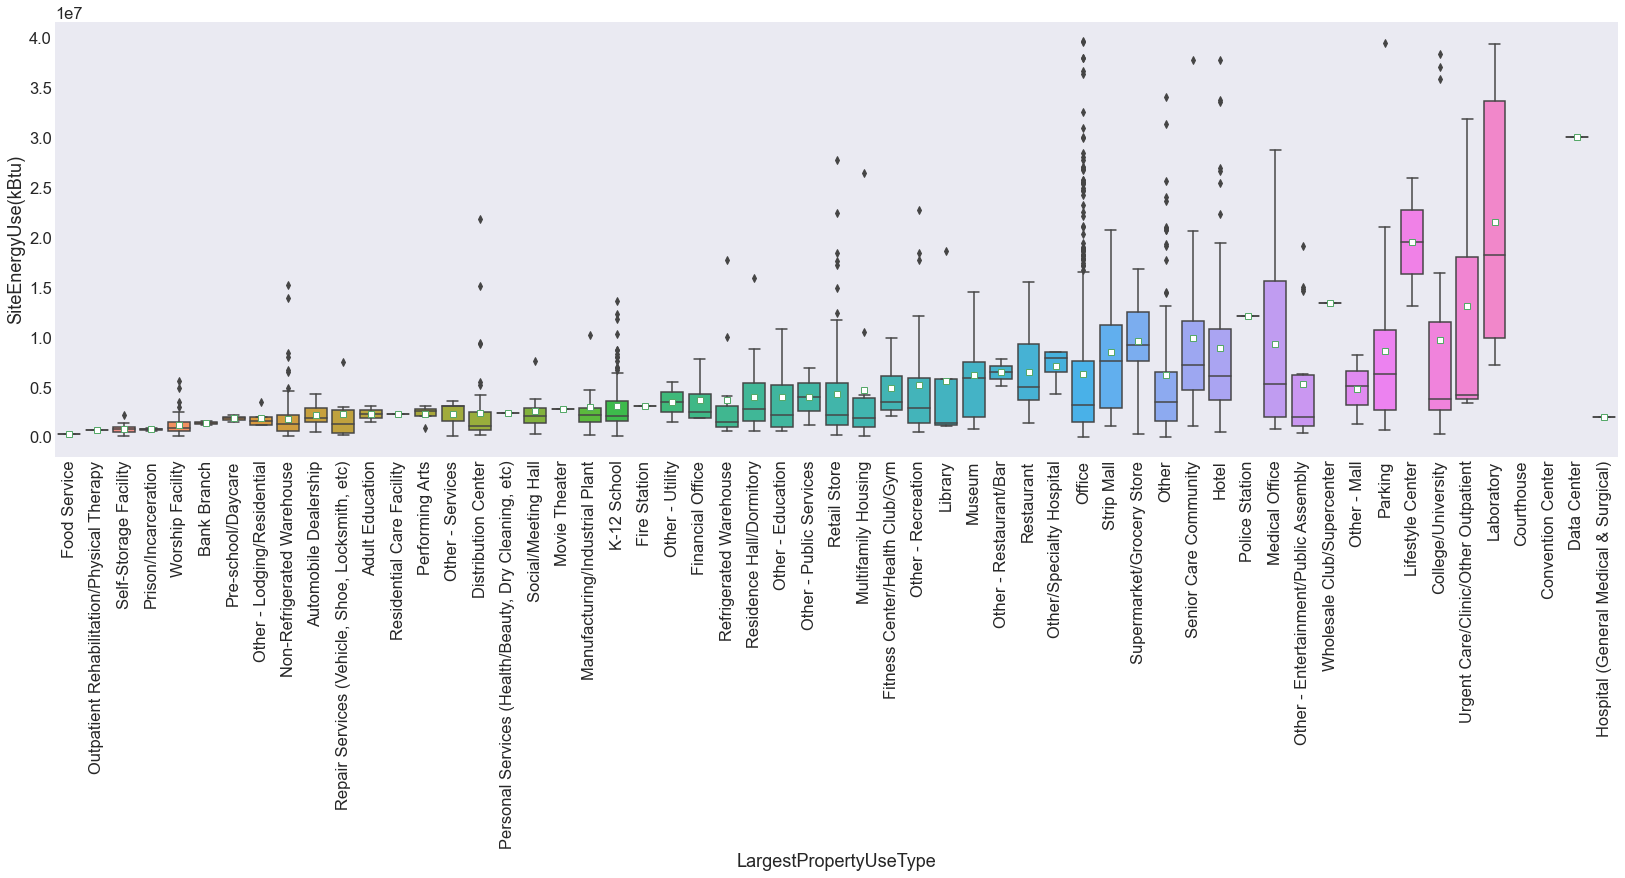

In [53]:
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.boxplot(x = data[(data['SiteEnergyUse(kBtu)']!=np.nan) & ((data['SiteEnergyUse(kBtu)']<4*10**7))]['LargestPropertyUseType'],
            y = data[(data['SiteEnergyUse(kBtu)']!=np.nan) & ((data['SiteEnergyUse(kBtu)']<4*10**7))]['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()
# ax.set_ylabel(rotation='horizontal', color=lcolor)

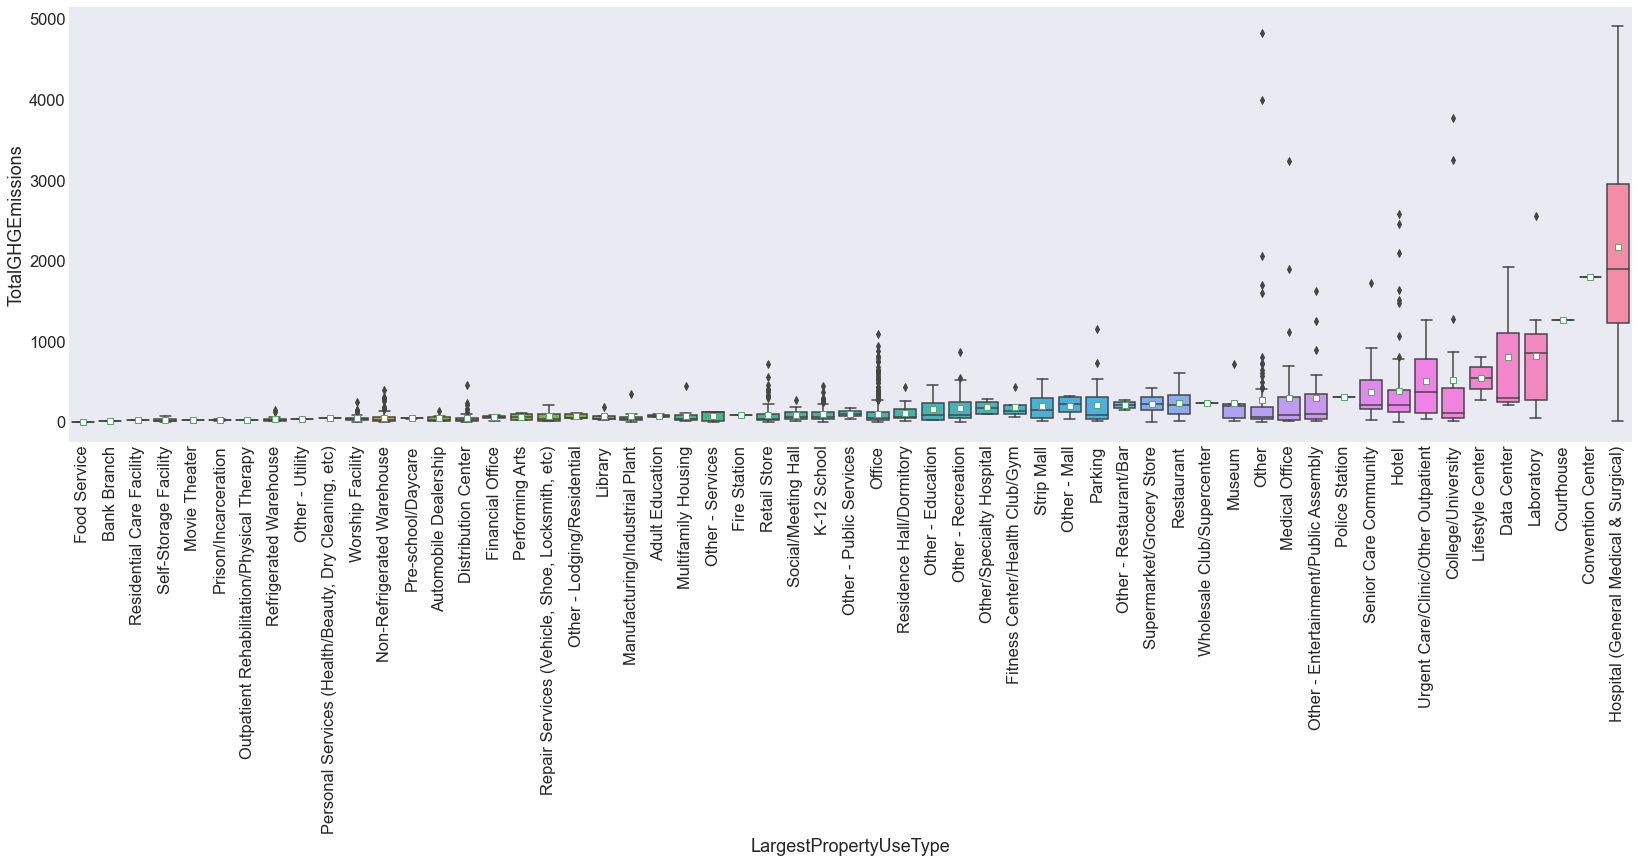

In [54]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.boxplot(x = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<5000))]['LargestPropertyUseType'],
            y = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<5000))]['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()
# ax.set_ylabel(rotation='horizontal', color=lcolor)

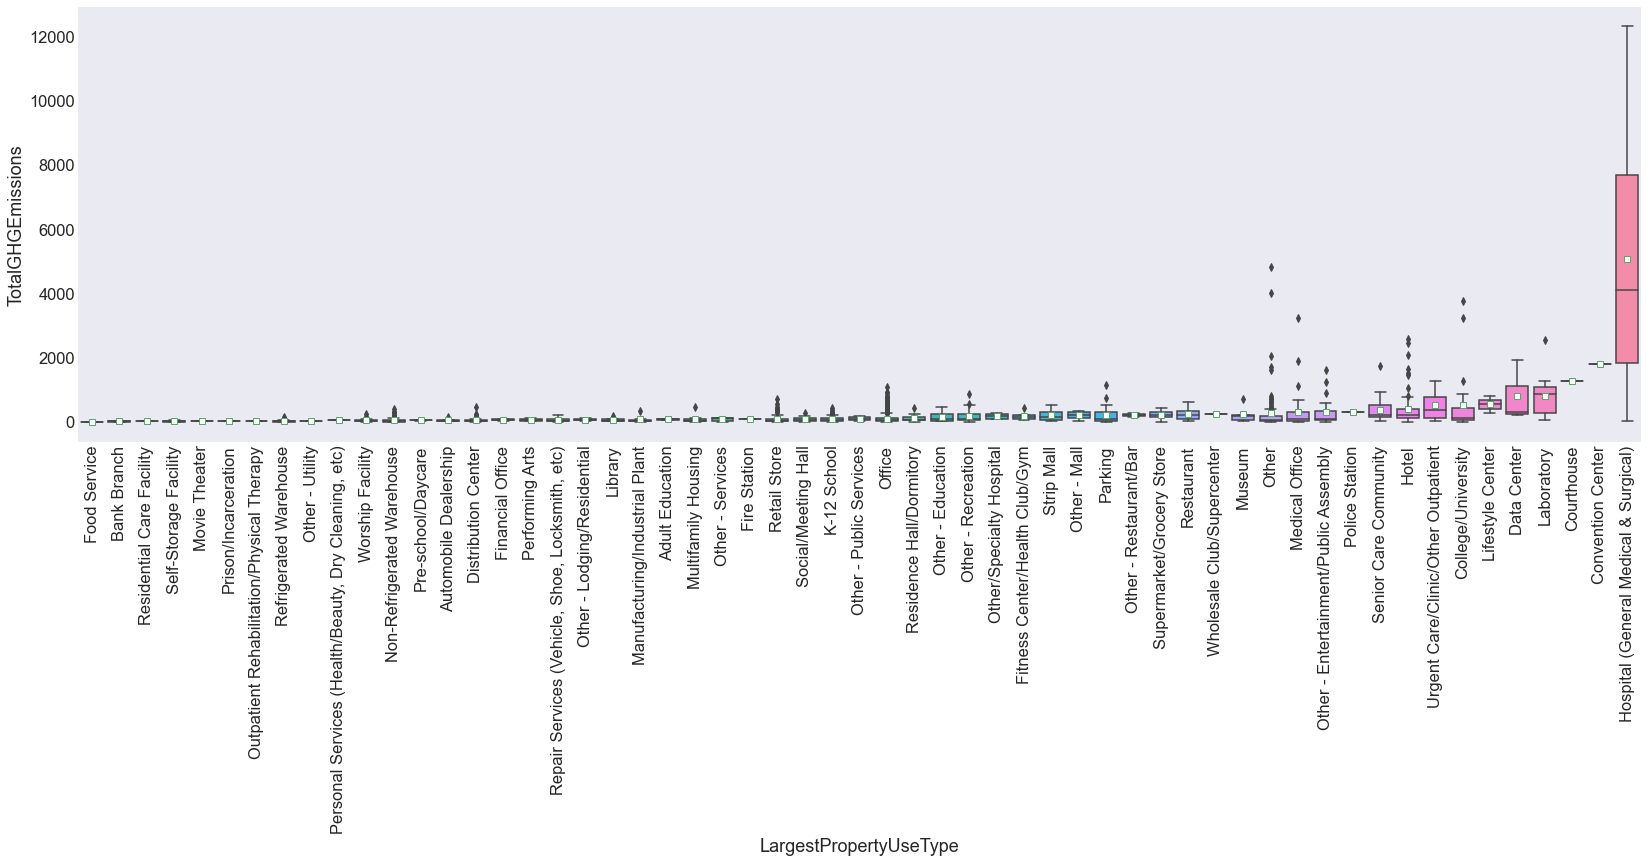

In [55]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.boxplot(x = data['LargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()
# ax.set_ylabel(rotation='horizontal', color=lcolor)

In [56]:
anova_variete_lp = smf.ols('SiteEnergyUse~LargestPropertyUseType+SecondLargestPropertyUseType', data=data.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse'})).fit()
print(anova_variete_lp.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     9.842
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           2.34e-80
Time:                        09:13:22   Log-Likelihood:                -15510.
No. Observations:                 864   AIC:                         3.120e+04
Df Residuals:                     773   BIC:                         3.164e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [57]:
data[data['LargestPropertyUseType'].isna()]

OSEBuildingID       BuildingType          PrimaryPropertyType  \
158             260  SPS-District K-12            SPS-District K-12   
196             325     NonResidential                 Retail Store   
349             496     NonResidential        Self-Storage Facility   
400             560     NonResidential   Non-Refrigerated Warehouse   
570             773     NonResidential  Small- and Mid-Sized Office   
584             790     NonResidential                        Other   
813           20967  SPS-District K-12            SPS-District K-12   
831           21103     NonResidential                        Hotel   
997           22138     NonResidential             Worship Facility   
1175          24035  SPS-District K-12            SPS-District K-12   
1301          24825     NonResidential   Non-Refrigerated Warehouse   
1312          24904     NonResidential           Mixed Use Property   
1369          25568     NonResidential  Small- and Mid-Sized Office   
1372          25654     NonResidential                 Retail Store   
1389          25711     NonResidential                   Restaurant   
1444          26532     NonResidential                 Retail Store   
1473          26821  SPS-District K-12            SPS-District K-12   

                                       PropertyName CouncilDistrictCode  \
158                     LINCOLN HIGH (SPS-DISTRICT)                   d   
196                    WESTLAKE MALL RETAIL PORTION                   g   
349                                Market St Center                   f   
400           EVERGREEN WHLSLE FLORIST (DEMOLISHED)                   g   
570      PACIFIC NW TITLE / OLD CHAMBER OF COMMERCE                   g   
584              PROLOGIS SEATTLE 10 (ROSS DISPLAY)                   b   
813                   COLUMBIA SCHOOL(SPS-DISTRICT)                   b   
831                                 Palladian Hotel                   g   
997                    BRIGHTON PRESBYTERIAN CHURCH                   b   
1175  RAINIER VIEW ELEMENTARY SCHOOL (SPS-DISTRICT)                   b   
1301                               2233 FIRST AVE S                   b   
1312                                         RETAIL                   g   
1369                            Talon Northlake LLC                   d   
1372                                FISHER BUILDING                   b   
1389               BUSH GARDEN - RESTURANT & LOUNGE                   b   
1444                               KALBERG BUILDING                   d   
1473                        MCDONALD (SPS-DISTRICT)                   f   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
158              Lake union       1997                  1               4   
196                Downtown       1989                  1               4   
349                 Ballard       1946                  2               2   
400              Lake union       1955                  1               1   
570                Downtown       1924                  1               4   
584        Greater duwamish       1969                  1               1   
813               Southeast       1925                  1               1   
831                Downtown       1910                  1               8   
997               Southeast       1927                  1               2   
1175              Southeast       1961                  1               1   
1301       Greater duwamish       1910                  1               2   
1312  Magnolia / queen anne       1928                  1               2   
1369             Lake union       2008                  1               4   
1372               Downtown       1900                  1               2   
1389               Downtown       1913                  1               3   
1444              Northeast       1928                  1               2   
1473              Northwest       1925                  1          

In [58]:
# data['LargestPropertyUseType'].fillna('Other', inplace=True)

### SecondLargestPropertyUseType

In [59]:
data['SecondLargestPropertyUseType'].nunique()

47

In [60]:
SecondLargestPropertyUseType = data['SecondLargestPropertyUseType'].value_counts().head(12).to_frame()
SecondLargestPropertyUseType.style.background_gradient(cmap='Reds')

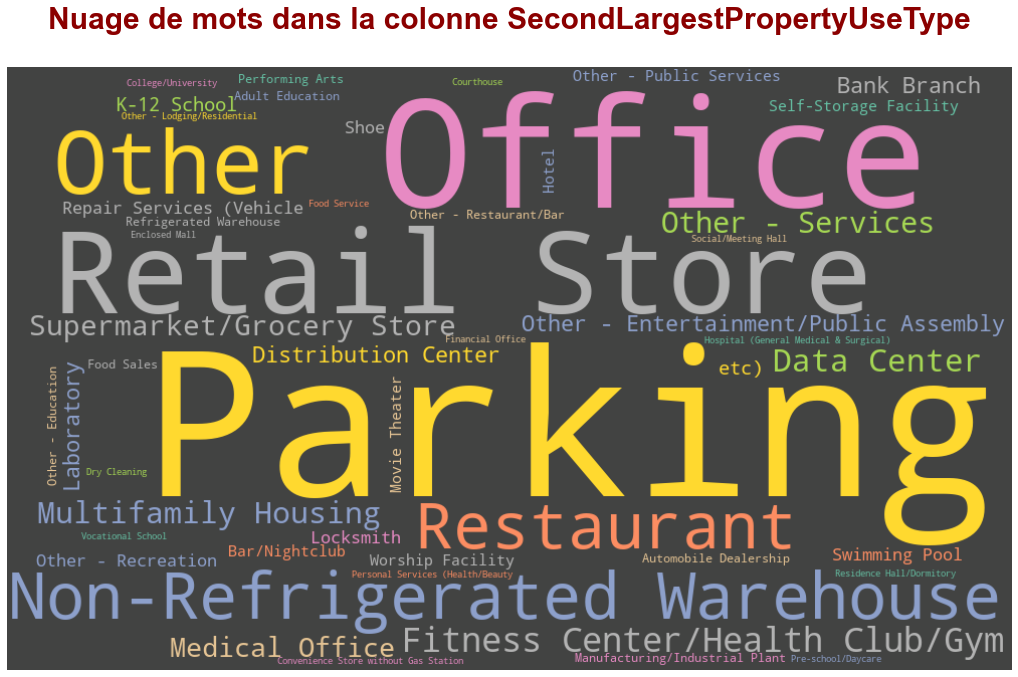

In [61]:
plot_world_cloud(df=data,column="SecondLargestPropertyUseType",nb_top=100)

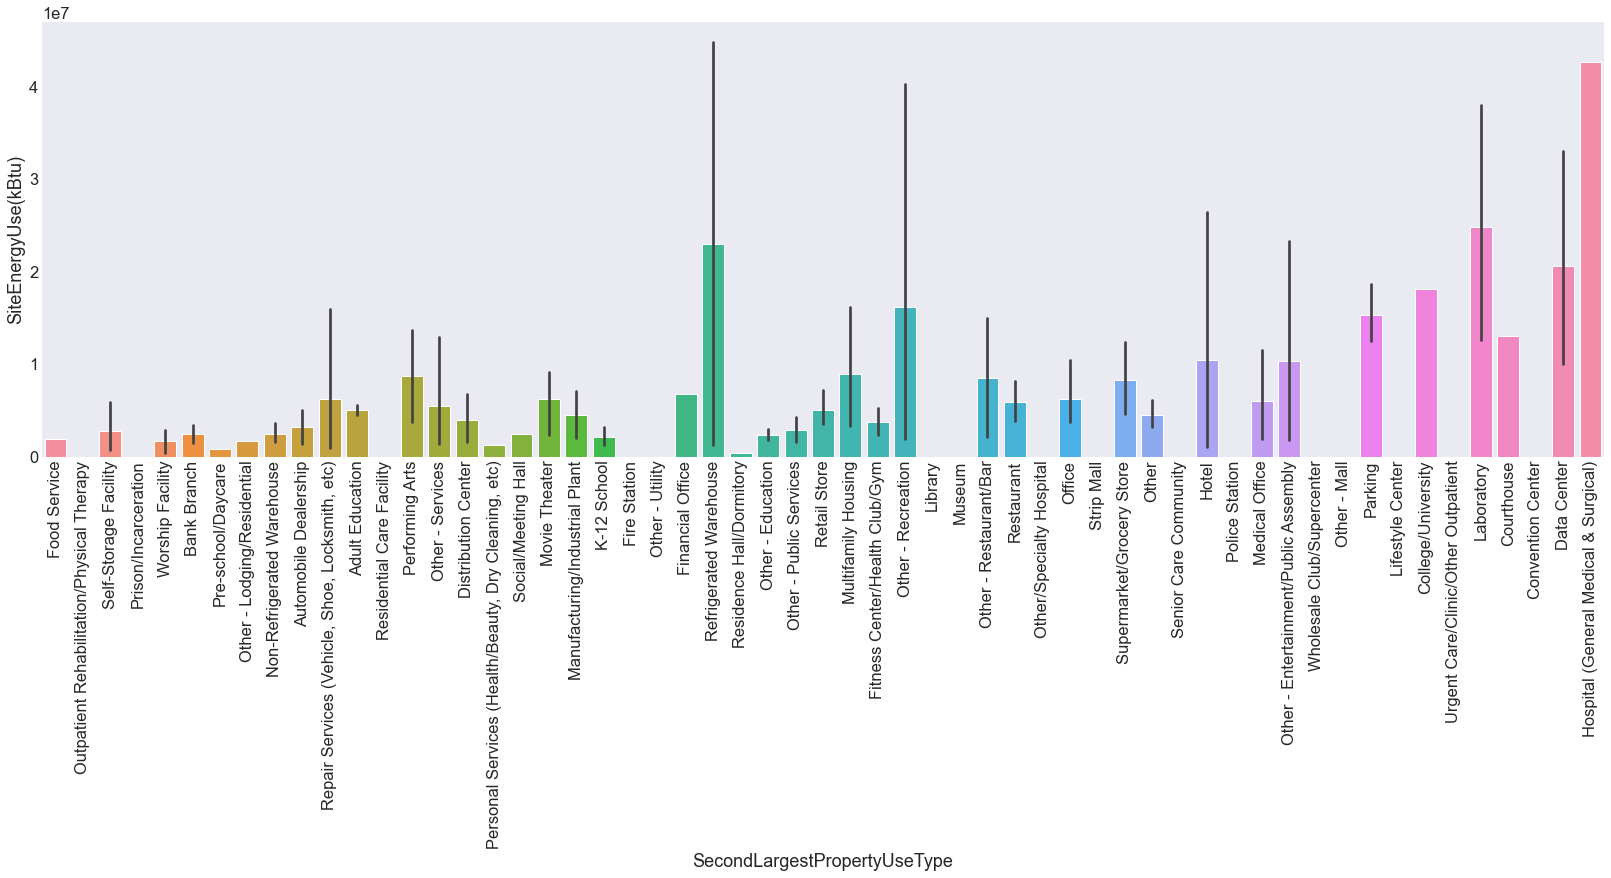

In [62]:
grouped_second = data.groupby(["SecondLargestPropertyUseType"])
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.barplot(x = data['SecondLargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

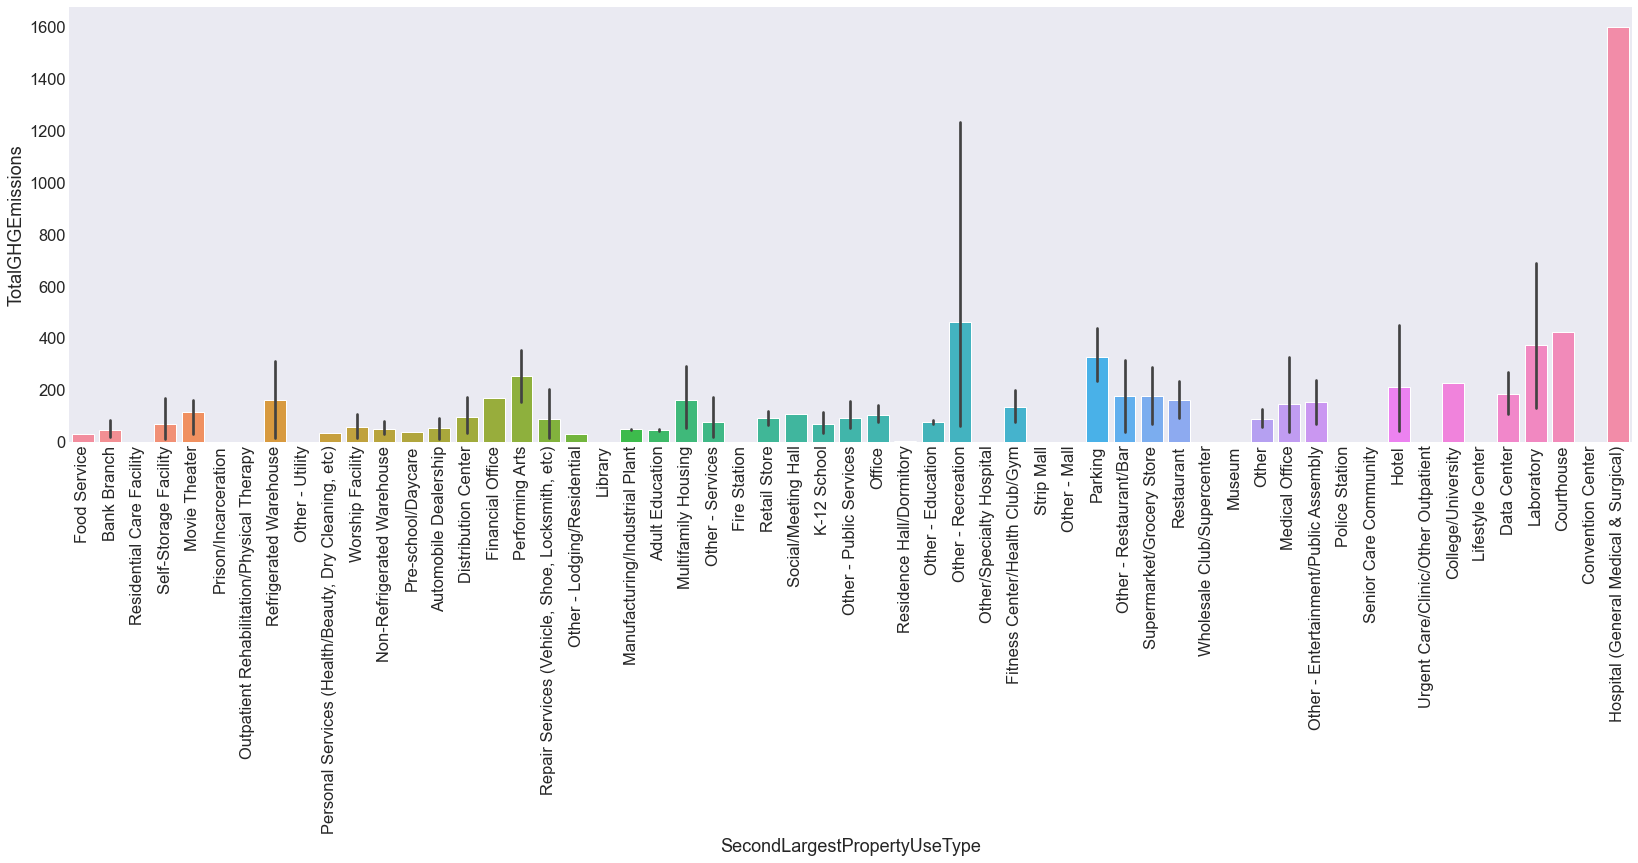

In [63]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.barplot(x = data['SecondLargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

In [64]:
anova_variete_slp = smf.ols('SiteEnergyUse~SecondLargestPropertyUseType', data=data.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse'})).fit()
print(anova_variete_slp.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.172
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.206
Time:                        09:13:29   Log-Likelihood:                -15813.
No. Observations:                 864   AIC:                         3.172e+04
Df Residuals:                     817   BIC:                         3.194e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### ThirdLargestPropertyUseType

In [65]:
data['ThirdLargestPropertyUseType'].nunique()

39

In [66]:
ThirdLargestPropertyUseType = data['ThirdLargestPropertyUseType'].value_counts().head(12).to_frame()
ThirdLargestPropertyUseType.style.background_gradient(cmap='Reds')

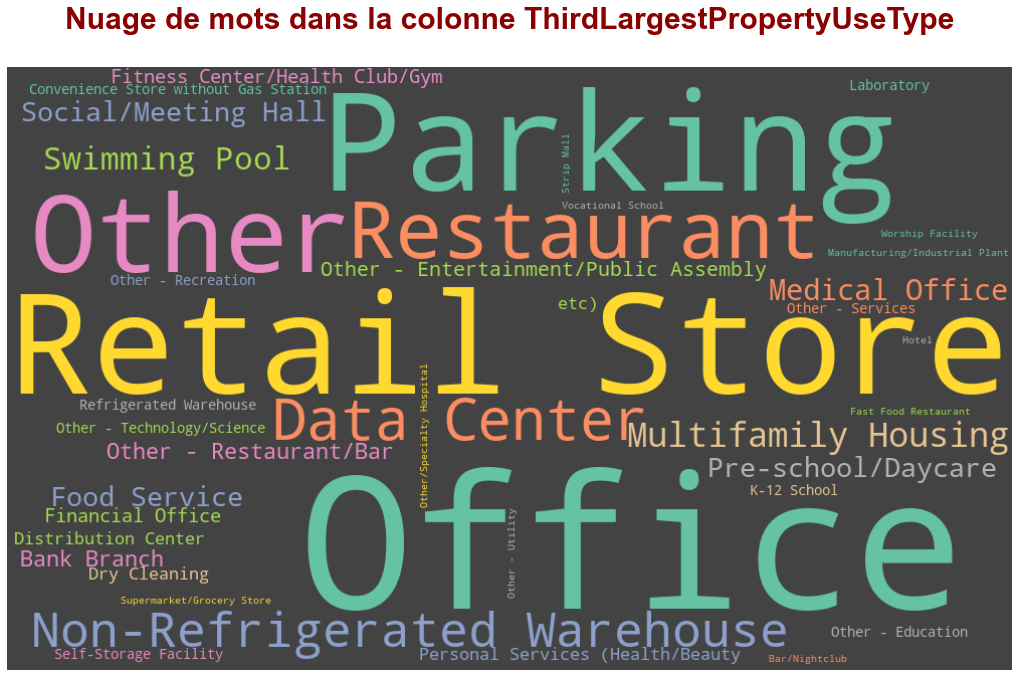

In [67]:
plot_world_cloud(df=data,column="ThirdLargestPropertyUseType",nb_top=100)

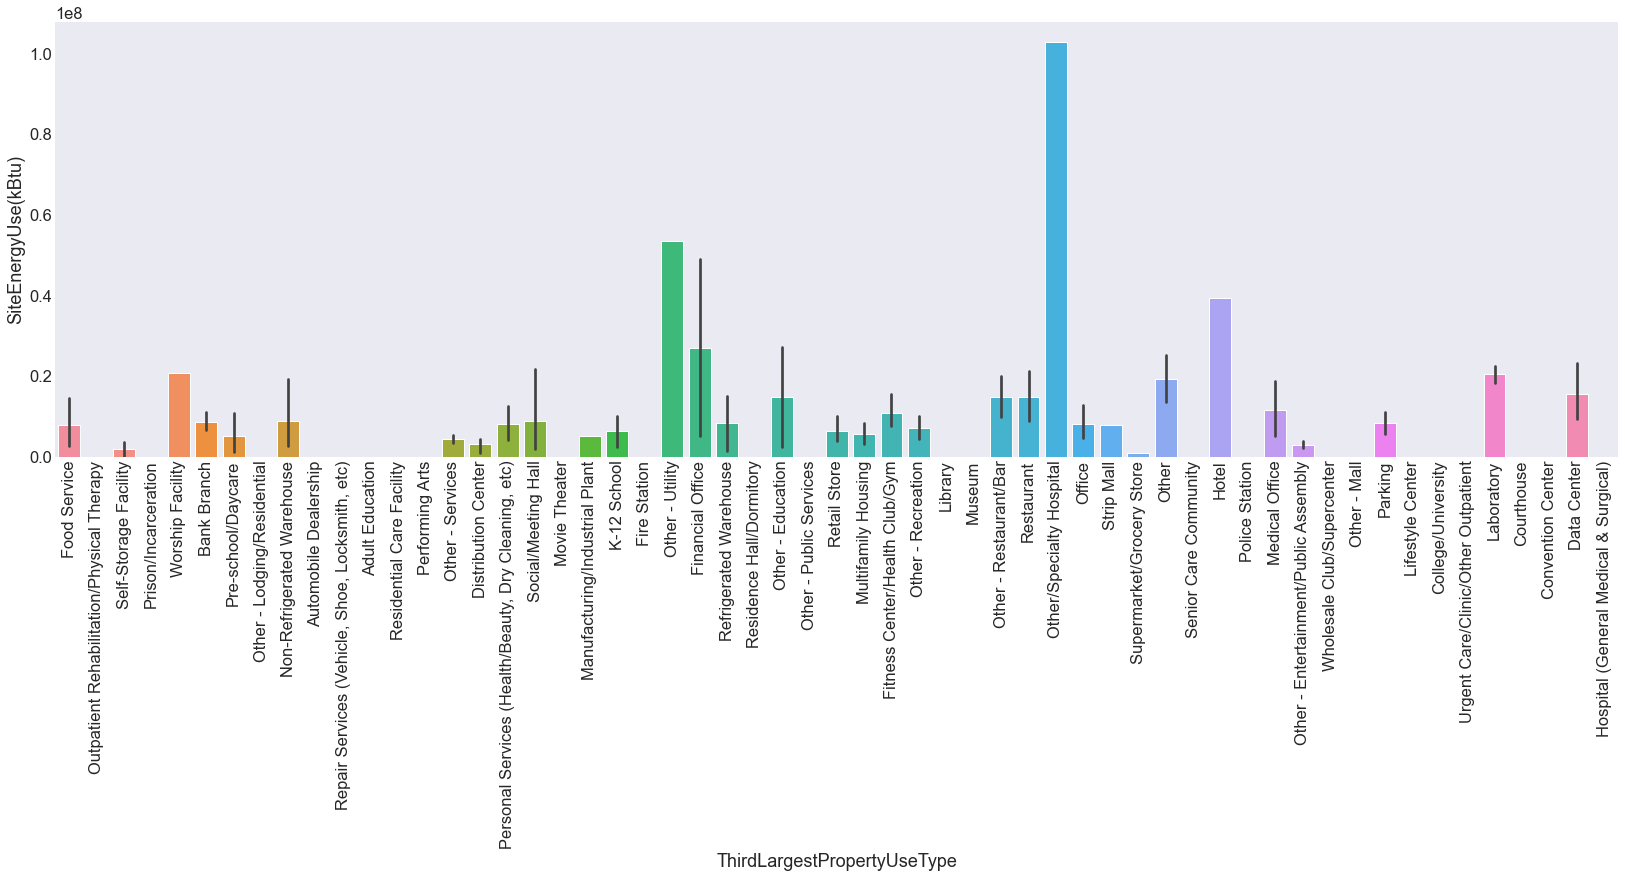

In [68]:
grouped_third = data.groupby(["ThirdLargestPropertyUseType"])
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.barplot(x = data['ThirdLargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

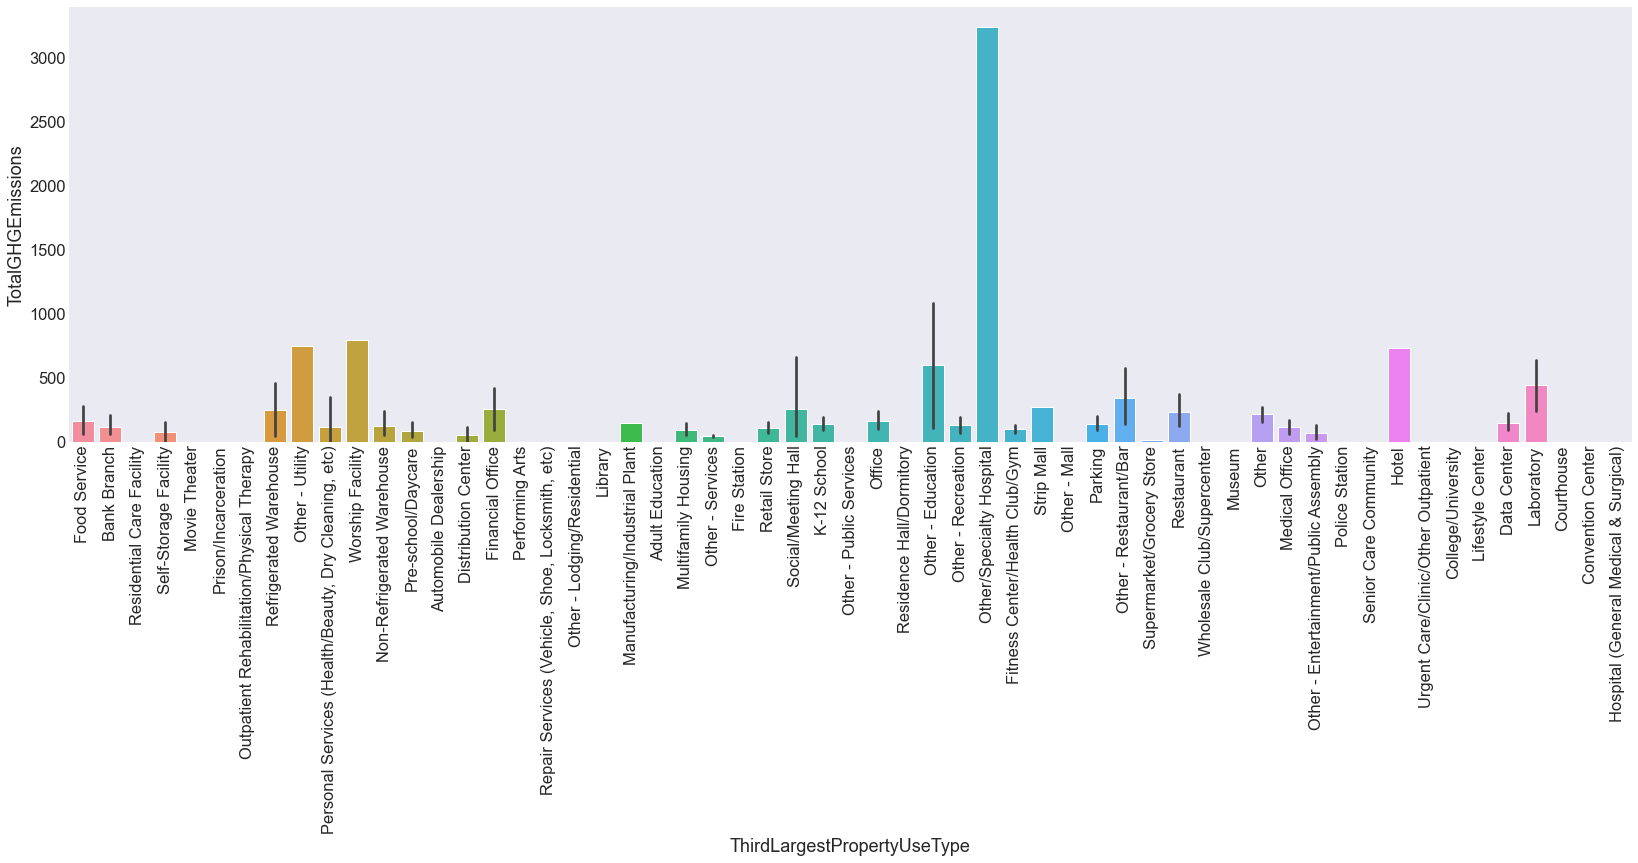

In [69]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.barplot(x = data['ThirdLargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

In [70]:
anova_variete_tlp = smf.ols('SiteEnergyUse~ThirdLargestPropertyUseType', data=data.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse'})).fit()
print(anova_variete_tlp.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.673
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.69e-06
Time:                        09:13:35   Log-Likelihood:                -6334.9
No. Observations:                 355   AIC:                         1.275e+04
Df Residuals:                     316   BIC:                         1.290e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### ENERGYSTARScore

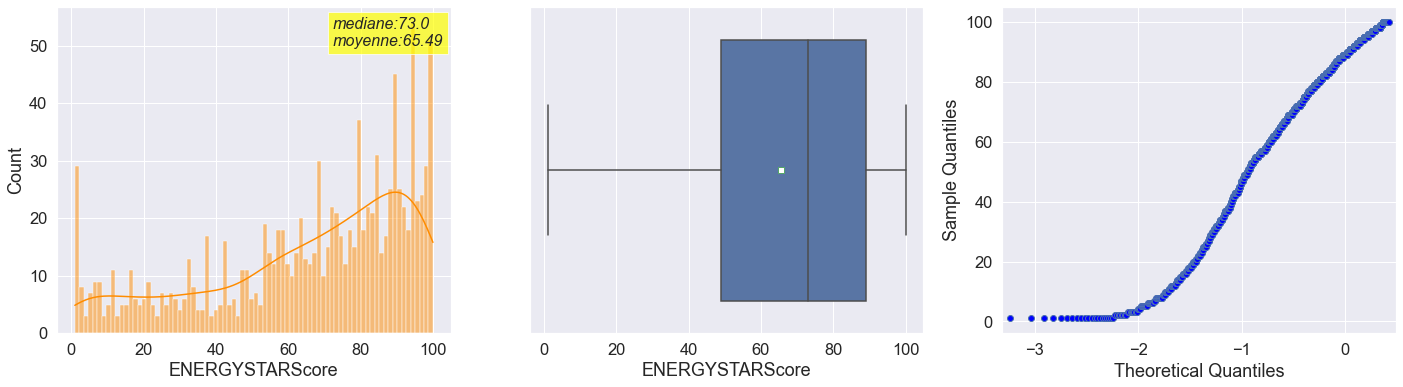

In [71]:
sns.set(
    rc={'figure.figsize': (24, 6)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)

ax = sns.histplot(data=data,
             x='ENERGYSTARScore',
             kde=True,
             ax=axes[0],
             bins=80,
             color="darkorange")
ax.text(0.7, 0.88, 'mediane:{:.3}\nmoyenne:{}'.format(data['ENERGYSTARScore'].median(), round(data['ENERGYSTARScore'].mean(),2)), style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'yellow', 'alpha':0.7, 'pad':5})
sns.boxplot(data=data,
            x='ENERGYSTARScore',
            ax=axes[1],
            showmeans=True,
            meanprops={
                "marker": "s",
                "markerfacecolor": "white"
            })
sm.qqplot(data['ENERGYSTARScore'], ax=axes[2], line="q")

py.show()

In [72]:
# normality test (normaltest)
stat, p = normaltest(data['ENERGYSTARScore'])
print('ENERGYSTARScore (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (shapiro)
stat, p = shapiro(data['ENERGYSTARScore'])
print('ENERGYSTARScore (Shapiro): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

ENERGYSTARScore (normaltest): 
Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)
ENERGYSTARScore (Shapiro): 
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


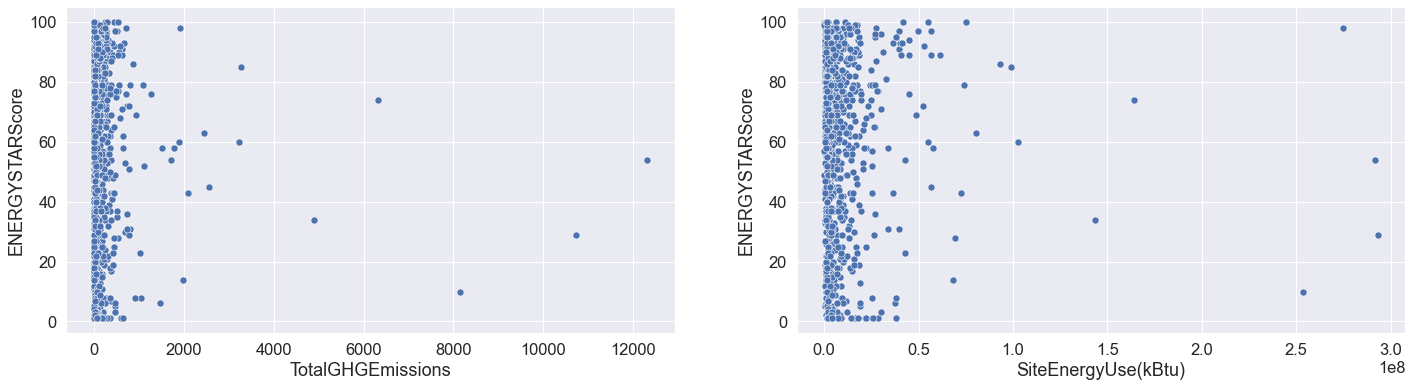

In [73]:
sns.set(
    rc={'figure.figsize': (24, 6)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

sns.scatterplot(y='ENERGYSTARScore',
                     x='TotalGHGEmissions',
                     ax=axes[0],
                     data=data,
                     s=50)
sns.scatterplot(y='ENERGYSTARScore',
                     x='SiteEnergyUse(kBtu)',
                     ax=axes[1],
                     data=data,
                     s=50)
    
plt.show()

In [74]:
used_columns = ['YearBuilt', 'AgeGroup']

data = data.drop(used_columns, axis=1)

Nous remarqons qu'il y a des feautures qui sont calculés à partir de variables 'TotalGHGEmissions' ou/et 'SiteEnergyUse(kBtu)'. 

Ce sont les features avec les suffix EUI(kBtu/sf) dont les valeurs sont ramenées à la surface par étage. 

Nous allons les supprimer ainsi que 'GHGEmissionsIntensity'. 

In [75]:
data = data.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity'], axis=1)

In [76]:
data.to_csv('data/building-energy-benchmarking_data.csv', index=False)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1687
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1686 non-null   int64  
 1   BuildingType                     1686 non-null   object 
 2   PrimaryPropertyType              1686 non-null   object 
 3   PropertyName                     1686 non-null   object 
 4   CouncilDistrictCode              1686 non-null   object 
 5   Neighborhood                     1686 non-null   object 
 6   NumberofBuildings                1686 non-null   int64  
 7   NumberofFloors                   1686 non-null   int64  
 8   PropertyGFATotal                 1686 non-null   int64  
 9   PropertyGFAParking               1686 non-null   int64  
 10  PropertyGFABuilding(s)           1686 non-null   int64  
 11  ListOfAllPropertyUseTypes        1673 non-null   object 
 12  LargestPropertyUseTy

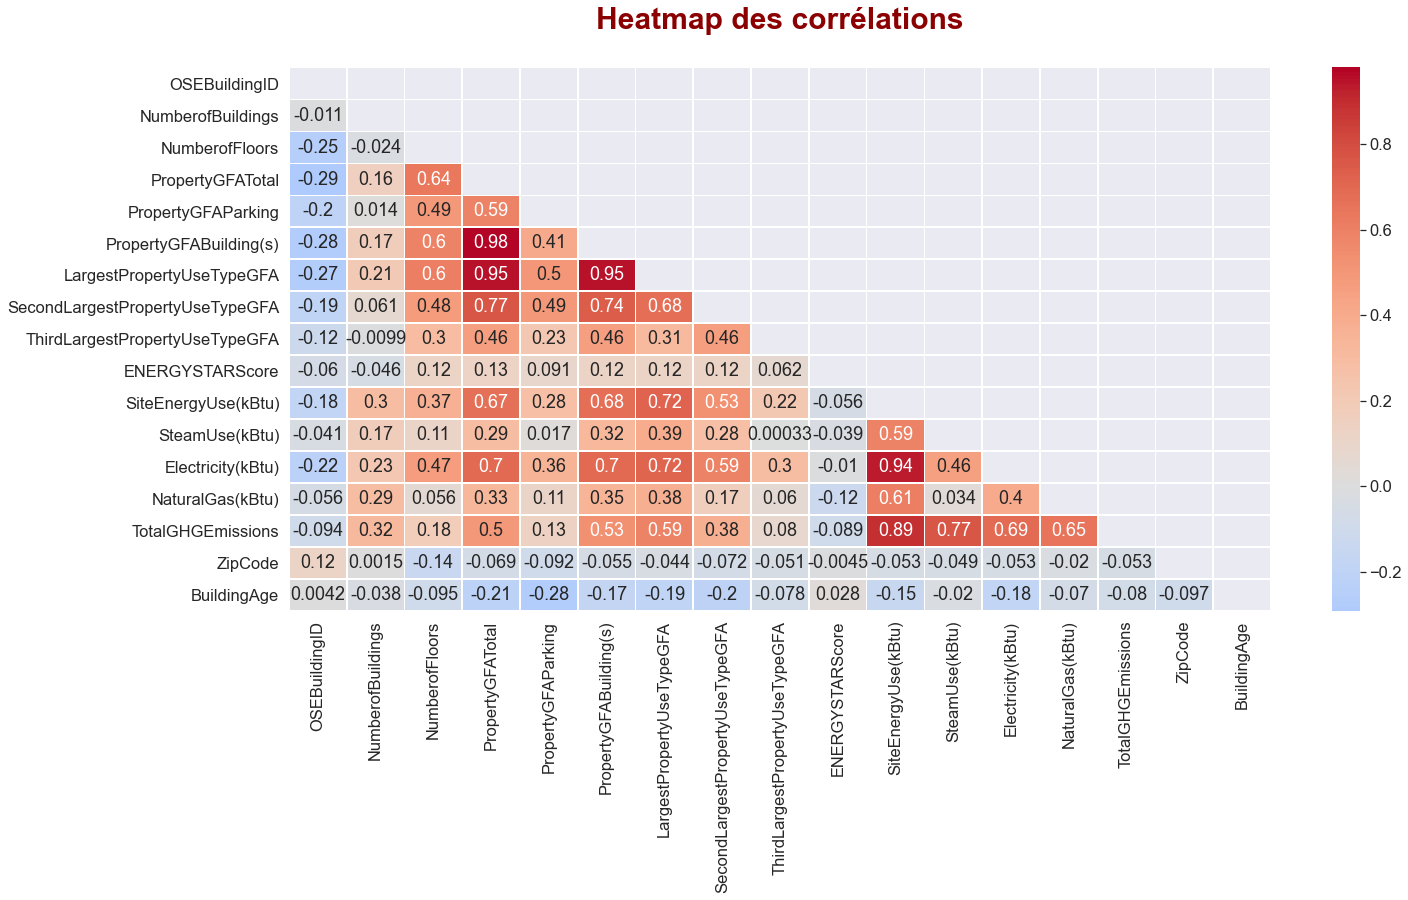

In [80]:
plt.subplots(figsize=(22, 10))
matrix = np.triu(data.corr())

ax = sns.heatmap(data.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap des corrélations\n', fontdict=font)
plt.show()

# 6. Features Engineering  (Notebook 3)

Nous allons transformer les données brutes en caractéristiques représentant plus précisément le problème sous-jacent au modèle prédictif.

Cela sera effectué dans un autre notebook.